# Sleep data analysis with R

For 4 weeks commencing on 26/10/2023, I (a 44 year old male) started a nonblinded randomised controlled crossover trial to determine the effects of the following interventions on sleep quality (Likert scale 1-5), sleep duration (hours), sleep onset latency (minutes), and wakefullness after sleep onset (Likert scale 1-5):
- 1 week of daily pre-bed melatonin (0.5 mg oral, 30 mins before bed),
- 1 week of daily pre-bed binaural beats (10 minutes, 30 mins before bed),
- 1 week of pre-bed melatonin combined with binaural beats, versus
- 1 week of no daily treatment (control).

To help understand the factors that might influence my sleep quality and quantity, I also measured several variables including my food, caffeine, alcohol, and chocolate intake, the timing of pre-bed food/caffeine/alcohol/chocolate intake, caffeine, pre-bed phone use, daily exercise (duration, intensity, load), exposure to sunlight, work stress, life stress, illness, and bed time.

## Check R version

In [95]:
# check R version
R.version.string

[1] "R version 4.4.1 (2024-06-14)"

## Install packages

In [96]:
# Define packages to install
packages <- c('tidyverse', 'stats', 'broom', 'sigr', 'infer', 'ggthemes')
# Install all packages that are not already installed
install.packages(setdiff(packages, rownames(installed.packages())))

In [97]:
# Load libraries
library(tidyverse) # core tidyverse packages (ggplot2, dplyr, tibble, tidyr, readr, etc)
library(stats) # for statistical analyses https://www.rdocumentation.org/packages/stats/versions/3.6.2
library(broom) # for statistical outputs in a table https://broom.tidymodels.org/articles/broom.html
library(sigr) # for statistical outputs in a sentence https://www.rdocumentation.org/packages/sigr/
library(infer) # for statistical inference https://infer.netlify.app/
library(ggthemes) # themes for ggplot2 https://www.rdocumentation.org/packages/ggthemes/versions/5.1.0

## Load data and view dataframe

In [98]:
# Read a CSV file using pandas
df <- read.csv("/20231201_sleep_data.csv")

# Show the dataframe
df

Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group
<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>
1,3.50,1,1,2,1.00,1,2,13.0,1,⋯,1,0,0,1,1410,60,7.00,4,1,Binaural Beats
2,5.00,0,1,2,2.00,1,1,14.0,1,⋯,1,0,0,1,1410,30,6.50,1,2,Binaural Beats
3,6.00,1,1,4,1.50,1,1,15.0,0,⋯,2,0,0,1,1530,15,7.00,2,2,Binaural Beats
4,3.00,0,1,2,6.00,1,2,9.0,0,⋯,1,0,0,1,1410,15,7.00,0,3,Binaural Beats
5,3.50,1,0,0,NA,1,1,15.0,0,⋯,1,0,0,1,1410,15,7.00,0,3,Binaural Beats
6,3.00,1,0,0,NA,1,1,14.0,1,⋯,1,0,0,1,1410,15,6.50,2,1,Binaural Beats
7,4.00,1,0,0,NA,1,2,7.5,0,⋯,1,1,0,1,1350,45,7.50,1,2,Binaural Beats
8,3.50,1,0,0,NA,1,1,13.5,1,⋯,2,0,1,1,1410,15,6.50,0,2,Melotonin + Binaural Beats
9,2.75,0,0,0,NA,1,1,14.0,1,⋯,1,0,1,1,1410,15,7.50,0,3,Melotonin + Binaural Beats


In [99]:
# check data type of every variable in data frame
str(df)

'data.frame':	28 obs. of  33 variables:
 $ Day                               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 2.75 3 ...
 $ Post_dinner_snacks                : int  1 0 1 0 1 1 1 1 0 0 ...
 $ Alcohol                           : int  1 1 1 1 0 0 0 0 0 0 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 0 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 NA NA NA NA NA NA ...
 $ Caffeinated_drinks                : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 14 13.5 ...
 $ Chocolate                         : int  1 1 0 0 0 1 0 1 1 1 ...
 $ Chocolate_time_before_bed         : num  2 6 NA NA NA 11 NA 1.5 6 9.5 ...
 $ Phone_use_before_bed              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Phone_use_duration                : int  5 15 5 5 5 20 15 10 2 15 ...
 $ Phone_use_time_before_bed  

In [100]:
# Get the Shape of the Data Frame (the number of rows and the number of columns, respectively)
dim(df)

[1] 28 33

In [101]:
# Summarise the values
summary(df)

      Day        Dinner_time_before_bed Post_dinner_snacks    Alcohol      
 Min.   : 1.00   Min.   :2.500          Min.   :0.0000     Min.   :0.0000  
 1st Qu.: 7.75   1st Qu.:3.000          1st Qu.:0.0000     1st Qu.:0.0000  
 Median :14.50   Median :3.500          Median :1.0000     Median :1.0000  
 Mean   :14.50   Mean   :3.625          Mean   :0.6071     Mean   :0.5714  
 3rd Qu.:21.25   3rd Qu.:3.625          3rd Qu.:1.0000     3rd Qu.:1.0000  
 Max.   :28.00   Max.   :7.500          Max.   :1.0000     Max.   :1.0000  
                                                                           
 Alcohol_units   Alcohol_time_before_bed Caffeinated_drinks
 Min.   :0.000   Min.   :1.000           Min.   :1         
 1st Qu.:0.000   1st Qu.:1.500           1st Qu.:1         
 Median :1.000   Median :1.875           Median :1         
 Mean   :1.107   Mean   :2.297           Mean   :1         
 3rd Qu.:2.000   3rd Qu.:2.125           3rd Qu.:1         
 Max.   :4.000   Max.   :6.000  

## Handle missing values
The NA values (missing values) should NOT be dropped but set as zero using fill_value=0.

In [102]:
# Quantify the number of missing values
sapply(df, function(x) sum(is.na(x)))  # count total missing values in each column of data frame

Day             Dinner_time_before_bed 
                                 0                                  0 
                Post_dinner_snacks                            Alcohol 
                                 0                                  0 
                     Alcohol_units            Alcohol_time_before_bed 
                                 0                                 12 
                Caffeinated_drinks            Caffeinated_drink_units 
                                 0                                  0 
Caffeinated_drinks_time_before_bed                          Chocolate 
                                 0                                  0 
         Chocolate_time_before_bed               Phone_use_before_bed 
                                10                                  0 
                Phone_use_duration          Phone_use_time_before_bed 
                                 0                                  0 
                          Exercise                  Exercise_duration 
                                 0                                  2 
                Exercise_intensity                      Exercise_load 
                                 2                                  2 
          Exercise_time_before_bed            Did_I_go_outdoors_today 
                                 2                                  0 
       Direct_sunlight_for_30_mins                               Work 
                                 0                                  0 
                       Work_stress                        Life_stress 
                                 0                                  0 
                           Illness                          Melotonin 
                                 0                                  0 
                    Binaural_beats                           Bed_time 
                                 0                                  0 
               Sleep_onset_latency                   Total_sleep_time 
                                 0                                  0 
     Wakefulness_after_sleep_onset                      Sleep_quality 
                                 0                                  0 
                             Group 
                                 0

In [103]:
# Replace NaN with 0 in the entire data frame
df[is.na(df)] <- 0

# Show first few rows
head(df)

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>
1,1,3.5,1,1,2,1.0,1,2,13,1,⋯,1,0,0,1,1410,60,7.0,4,1,Binaural Beats
2,2,5.0,0,1,2,2.0,1,1,14,1,⋯,1,0,0,1,1410,30,6.5,1,2,Binaural Beats
3,3,6.0,1,1,4,1.5,1,1,15,0,⋯,2,0,0,1,1530,15,7.0,2,2,Binaural Beats
4,4,3.0,0,1,2,6.0,1,2,9,0,⋯,1,0,0,1,1410,15,7.0,0,3,Binaural Beats
5,5,3.5,1,0,0,0.0,1,1,15,0,⋯,1,0,0,1,1410,15,7.0,0,3,Binaural Beats
6,6,3.0,1,0,0,0.0,1,1,14,1,⋯,1,0,0,1,1410,15,6.5,2,1,Binaural Beats


In [104]:
# Re-quantify the number of missing values
sapply(df, function(x) sum(is.na(x)))  # count total missing values in each column of data frame

Day             Dinner_time_before_bed 
                                 0                                  0 
                Post_dinner_snacks                            Alcohol 
                                 0                                  0 
                     Alcohol_units            Alcohol_time_before_bed 
                                 0                                  0 
                Caffeinated_drinks            Caffeinated_drink_units 
                                 0                                  0 
Caffeinated_drinks_time_before_bed                          Chocolate 
                                 0                                  0 
         Chocolate_time_before_bed               Phone_use_before_bed 
                                 0                                  0 
                Phone_use_duration          Phone_use_time_before_bed 
                                 0                                  0 
                          Exercise                  Exercise_duration 
                                 0                                  0 
                Exercise_intensity                      Exercise_load 
                                 0                                  0 
          Exercise_time_before_bed            Did_I_go_outdoors_today 
                                 0                                  0 
       Direct_sunlight_for_30_mins                               Work 
                                 0                                  0 
                       Work_stress                        Life_stress 
                                 0                                  0 
                           Illness                          Melotonin 
                                 0                                  0 
                    Binaural_beats                           Bed_time 
                                 0                                  0 
               Sleep_onset_latency                   Total_sleep_time 
                                 0                                  0 
     Wakefulness_after_sleep_onset                      Sleep_quality 
                                 0                                  0 
                             Group 
                                 0

## Data viz

### Sleep quality

In [105]:
# Check the unique values of the Group column in the original data frame (df)
unique(df$Group)

[1] "Binaural Beats"             "Melotonin + Binaural Beats"
[3] "Melotonin"                  "Control"

# A tibble: 4 × 4
  Group                              n mean_sleep_quality sd_sleep_quality
  <fct>                          <int>              <dbl>            <dbl>
1 "Binaural\nBeats"                  7               2               0.816
2 "Control"                          7               1.57            0.787
3 "Melotonin"                        7               2               0.577
4 "Melotonin\n+ Binaural\nBeats"     7               2.29            0.756


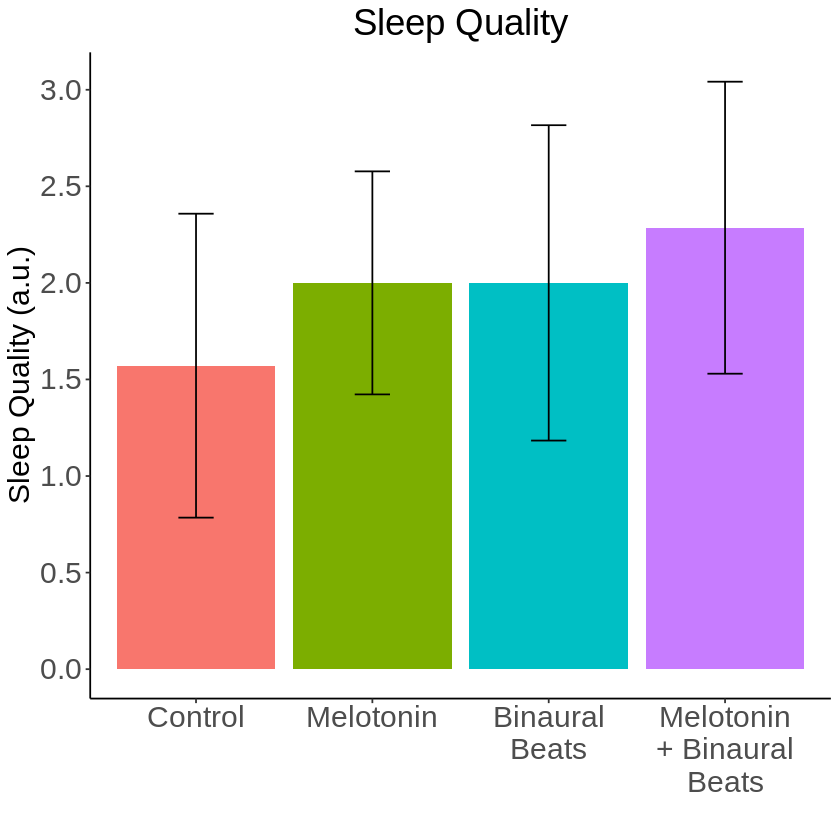

In [106]:
# Summarize the data: calculate the mean and standard deviation of Sleep_quality for each Group
summary_data_sleepQuality <- df %>%
  group_by(Group) %>%
  summarise(
    n = n(),  # Calculate the sample size for each group
    mean_sleep_quality = mean(Sleep_quality, na.rm = TRUE),
    sd_sleep_quality = sd(Sleep_quality, na.rm = TRUE)
  )

# Wrap the text for x-axis labels before setting factor levels
summary_data_sleepQuality$Group <- str_wrap(as.character(summary_data_sleepQuality$Group), width = 10)  # Adjust the width as needed

# Correctly order the Group factor levels AFTER wrapping text
summary_data_sleepQuality$Group <- factor(summary_data_sleepQuality$Group,
                             levels = str_wrap(c("Control", "Melotonin", "Binaural Beats", "Melotonin + Binaural Beats"), width = 10))

# Create the bar plot with error bars
ggplot(summary_data_sleepQuality, aes(x = Group, y = mean_sleep_quality, fill = Group)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Create bars
  geom_errorbar(aes(ymin = mean_sleep_quality - sd_sleep_quality,
                    ymax = mean_sleep_quality + sd_sleep_quality),
                width = 0.2) +  # Error bars with specified width
  labs(title = "Sleep Quality",
       x = "",
       y = "Sleep Quality (a.u.)") +
  scale_y_continuous(breaks = seq(0, max(summary_data_sleepQuality$mean_sleep_quality + max(summary_data_sleepQuality$sd_sleep_quality)), by = 0.5)) +  # Set y-axis breaks
  theme_classic() +  # Use classic theme
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),  # Center and increase title font size
    axis.title.x = element_text(size = 18),  # Increase x-axis title font size
    axis.title.y = element_text(size = 18),  # Increase y-axis title font size
    axis.text = element_text(size = 18) # Increase axis text font size
  )
print(summary_data_sleepQuality)

### Sleep duration

# A tibble: 4 × 4
  Group                              n mean_Total_sleep_time sd_Total_sleep_time
  <fct>                          <int>                 <dbl>               <dbl>
1 "Binaural\nBeats"                  7                  6.93               0.345
2 "Control"                          7                  7.21               0.796
3 "Melotonin"                        7                  7.07               0.450
4 "Melotonin\n+ Binaural\nBeats"     7                  7.25               0.924


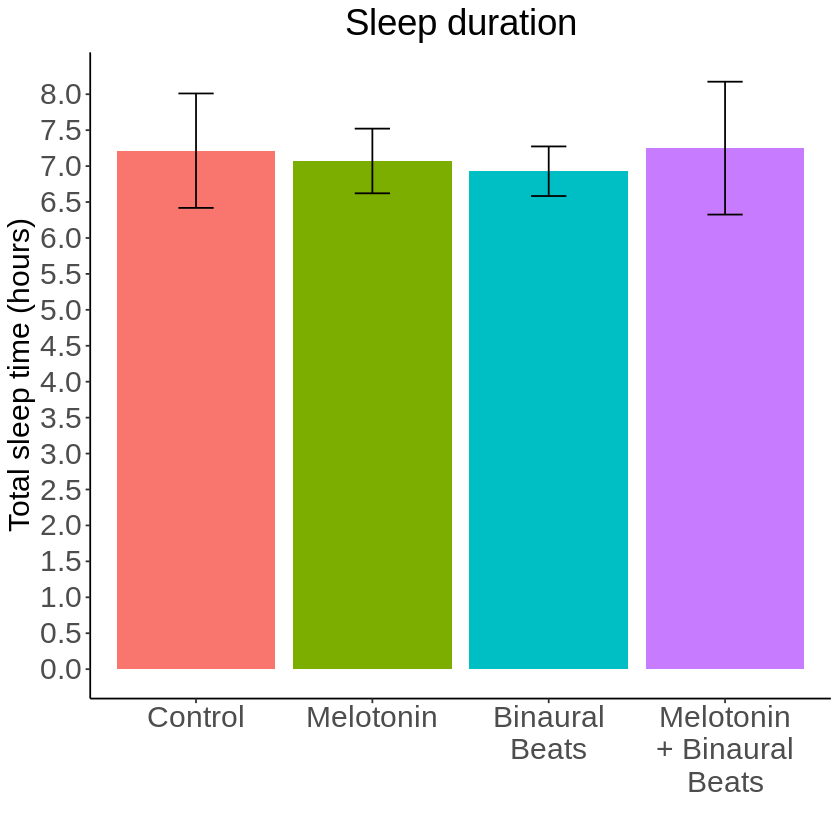

In [107]:
# Summarize the data: calculate the mean and standard deviation of Total_sleep_time for each Group
summary_data_sleepDuration <- df %>%
  group_by(Group) %>%
  summarise(
    n = n(),  # Calculate the sample size for each group
    mean_Total_sleep_time = mean(Total_sleep_time, na.rm = TRUE),
    sd_Total_sleep_time = sd(Total_sleep_time, na.rm = TRUE)
  )

# Wrap the text for x-axis labels before setting factor levels
summary_data_sleepDuration$Group <- str_wrap(as.character(summary_data_sleepDuration$Group), width = 10)  # Adjust the width as needed

# Correctly order the Group factor levels AFTER wrapping text
summary_data_sleepDuration$Group <- factor(summary_data_sleepDuration$Group,
                             levels = str_wrap(c("Control", "Melotonin", "Binaural Beats", "Melotonin + Binaural Beats"), width = 10))

# Create the bar plot with error bars
ggplot(summary_data_sleepDuration, aes(x = Group, y = mean_Total_sleep_time, fill = Group)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Create bars
  geom_errorbar(aes(ymin = mean_Total_sleep_time - sd_Total_sleep_time,
                    ymax = mean_Total_sleep_time + sd_Total_sleep_time),
                width = 0.2) +  # Error bars with specified width
  labs(title = "Sleep duration",
       x = "",
       y = "Total sleep time (hours)") +
  scale_y_continuous(breaks = seq(0, max(summary_data_sleepDuration$mean_Total_sleep_time + max(summary_data_sleepDuration$sd_Total_sleep_time)), by = 0.5)) +  # Set y-axis breaks
  theme_classic() +  # Use classic theme
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),  # Center and increase title font size
    axis.title.x = element_text(size = 18),  # Increase x-axis title font size
    axis.title.y = element_text(size = 18),  # Increase y-axis title font size
    axis.text = element_text(size = 18) # Increase axis text font size
  )
print(summary_data_sleepDuration)

### Sleep onset latency

# A tibble: 4 × 4
  Group                          n mean_Sleep_onset_lat…¹ sd_Sleep_onset_latency
  <fct>                      <int>                  <dbl>                  <dbl>
1 "Binaural\nBeats"              7                   27.9                  18.2 
2 "Control"                      7                   34.3                  20.7 
3 "Melotonin"                    7                   19.3                   7.32
4 "Melotonin\n+ Binaural\nB…     7                   19.3                   7.32
# ℹ abbreviated name: ¹​mean_Sleep_onset_latency


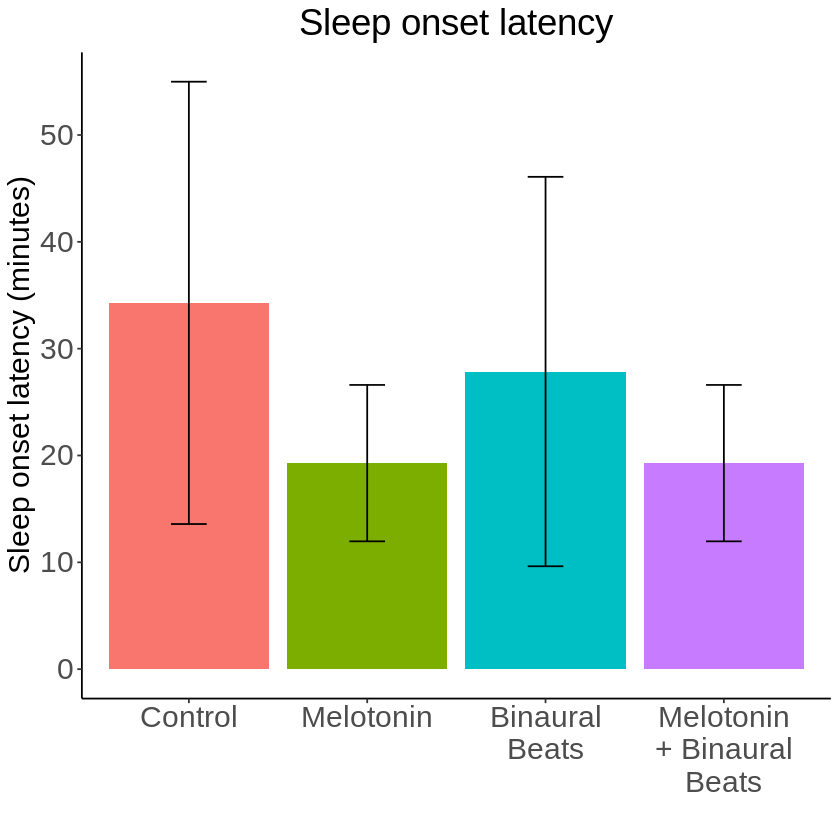

In [108]:
# Summarize the data: calculate the mean and standard deviation of Sleep_onset_latency for each Group
summary_data_sleepOnsetlatency <- df %>%
  group_by(Group) %>%
  summarise(
    n = n(),  # Calculate the sample size for each group
    mean_Sleep_onset_latency = mean(Sleep_onset_latency, na.rm = TRUE),
    sd_Sleep_onset_latency = sd(Sleep_onset_latency, na.rm = TRUE)
  )

# Wrap the text for x-axis labels before setting factor levels
summary_data_sleepOnsetlatency$Group <- str_wrap(as.character(summary_data_sleepOnsetlatency$Group), width = 10)  # Adjust the width as needed

# Correctly order the Group factor levels AFTER wrapping text
summary_data_sleepOnsetlatency$Group <- factor(summary_data_sleepOnsetlatency$Group,
                             levels = str_wrap(c("Control", "Melotonin", "Binaural Beats", "Melotonin + Binaural Beats"), width = 10))

# Create the bar plot with error bars
ggplot(summary_data_sleepOnsetlatency, aes(x = Group, y = mean_Sleep_onset_latency, fill = Group)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Create bars
  geom_errorbar(aes(ymin = mean_Sleep_onset_latency - sd_Sleep_onset_latency,
                    ymax = mean_Sleep_onset_latency + sd_Sleep_onset_latency),
                width = 0.2) +  # Error bars with specified width
  labs(title = "Sleep onset latency",
       x = "",
       y = "Sleep onset latency (minutes)") +
  scale_y_continuous(breaks = seq(0, max(summary_data_sleepOnsetlatency$mean_Sleep_onset_latency + max(summary_data_sleepOnsetlatency$sd_Sleep_onset_latency)), by = 10)) +  # Set y-axis breaks
  theme_classic() +  # Use classic theme
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),  # Center and increase title font size
    axis.title.x = element_text(size = 18),  # Increase x-axis title font size
    axis.title.y = element_text(size = 18),  # Increase y-axis title font size
    axis.text = element_text(size = 18) # Increase axis text font size
  )
print(summary_data_sleepOnsetlatency)

### Wakefullness

# A tibble: 4 × 4
  Group                          n mean_Wakefulness_aft…¹ sd_Wakefulness_after…²
  <fct>                      <int>                  <dbl>                  <dbl>
1 "Binaural\nBeats"              7                  1.43                   1.40 
2 "Control"                      7                  1.43                   1.13 
3 "Melotonin"                    7                  0.429                  0.535
4 "Melotonin\n+ Binaural\nB…     7                  0.571                  0.535
# ℹ abbreviated names: ¹​mean_Wakefulness_after_sleep_onset,
#   ²​sd_Wakefulness_after_sleep_onset


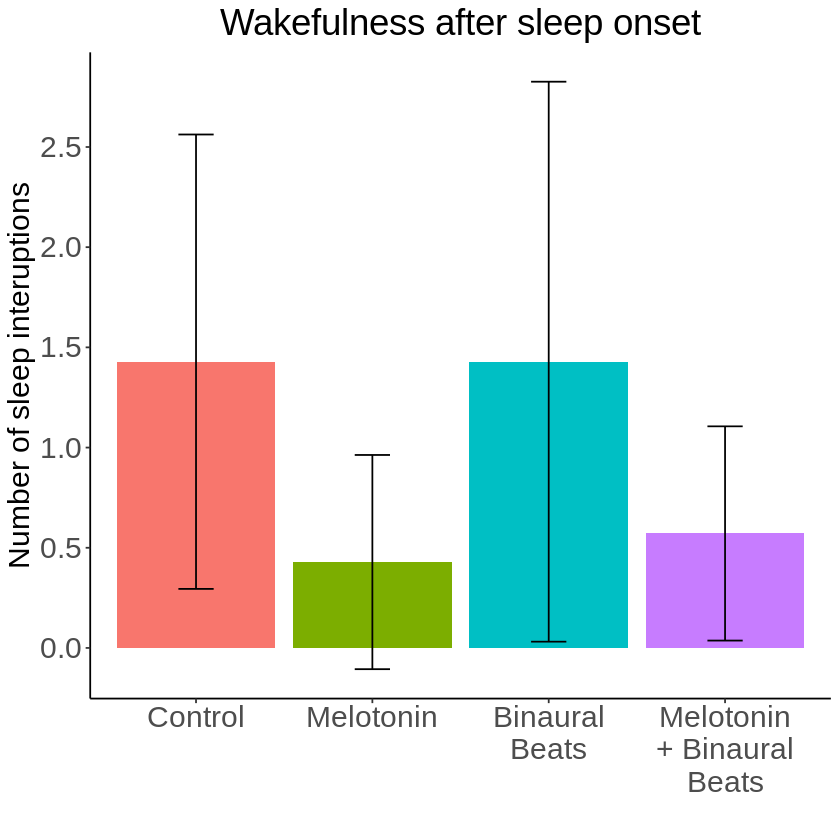

In [109]:
# Summarize the data: calculate the mean and standard deviation of Wakefulness_after_sleep_onset for each Group
summary_data_Wakefullness <- df %>%
  group_by(Group) %>%
  summarise(
    n = n(),  # Calculate the sample size for each group
    mean_Wakefulness_after_sleep_onset = mean(Wakefulness_after_sleep_onset, na.rm = TRUE),
    sd_Wakefulness_after_sleep_onset = sd(Wakefulness_after_sleep_onset, na.rm = TRUE)
  )

# Wrap the text for x-axis labels before setting factor levels
summary_data_Wakefullness$Group <- str_wrap(as.character(summary_data_Wakefullness$Group), width = 10)  # Adjust the width as needed

# Correctly order the Group factor levels AFTER wrapping text
summary_data_Wakefullness$Group <- factor(summary_data_Wakefullness$Group,
                             levels = str_wrap(c("Control", "Melotonin", "Binaural Beats", "Melotonin + Binaural Beats"), width = 10))

# Create the bar plot with error bars
ggplot(summary_data_Wakefullness, aes(x = Group, y = mean_Wakefulness_after_sleep_onset, fill = Group)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Create bars
  geom_errorbar(aes(ymin = mean_Wakefulness_after_sleep_onset - sd_Wakefulness_after_sleep_onset,
                    ymax = mean_Wakefulness_after_sleep_onset + sd_Wakefulness_after_sleep_onset),
                width = 0.2) +  # Error bars with specified width
  labs(title = "Wakefulness after sleep onset",
       x = "",
       y = "Number of sleep interuptions") +
  scale_y_continuous(breaks = seq(0, max(summary_data_Wakefullness$mean_Wakefulness_after_sleep_onset + max(summary_data_Wakefullness$sd_Wakefulness_after_sleep_onset)), by = 0.5)) +  # Set y-axis breaks
  theme_classic() +  # Use classic theme
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),  # Center and increase title font size
    axis.title.x = element_text(size = 18),  # Increase x-axis title font size
    axis.title.y = element_text(size = 18),  # Increase y-axis title font size
    axis.text = element_text(size = 18) # Increase axis text font size
  )
print(summary_data_Wakefullness)

# Statistical analyses

## Sleep quality

#### Normality
Shapiro-Wilk Test: Good for small to moderate sample sizes. <br>
Q-Q Plot: A visual method to assess normality.

In [110]:
# Perform Shapiro-Wilk test for normality on Sleep_quality
shapiro_test_result_SleepQuality <- shapiro.test(df$Sleep_quality)

# Print the result
print(shapiro_test_result_SleepQuality)

# Interpret the p-value
if (shapiro_test_result_SleepQuality$p.value < 0.05) {
  cat("P is less than 0.05, indicating that the data deviates from a normal distribution.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.\nThe data do not need to be scaled and a parametric test can be used.\n")
}


	Shapiro-Wilk normality test

data:  df$Sleep_quality
W = 0.81263, p-value = 0.0001798

P is less than 0.05, indicating that the data deviates from a normal distribution.
A nonparametric test should be used, or the data should be scaled before using a parametric test.


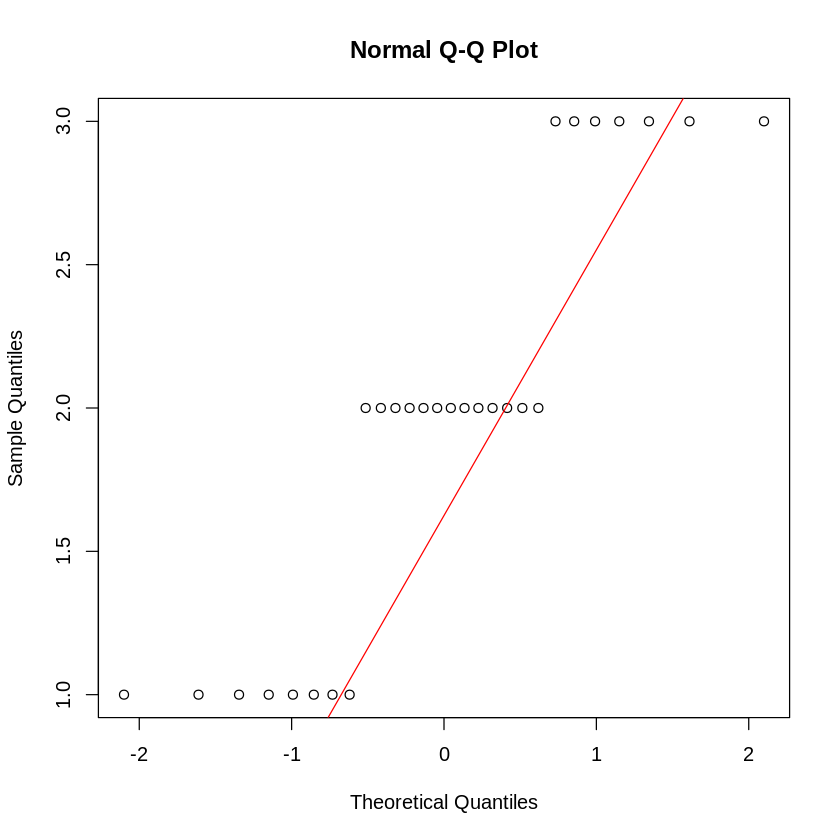

In [111]:
# Q-Q Plot for visual assessment of normality
qqnorm(df$Sleep_quality)
qqline(df$Sleep_quality, col = "red")  # Add reference line

#### Heteroscedasticity
Levene's Test: robust to non-normal data

In [112]:
# Install and load necessary package
install.packages("car")
library(car)

# Perform Levene's test
levene_test_result_SleepQuality <- leveneTest(Sleep_quality ~ Group, data = df, center=median)
print(levene_test_result_SleepQuality)

# Interpret the p-value
if (levene_test_result_SleepQuality$`Pr(>F)`[1] < 0.05) {
  cat("P is less than 0.05, indicating that there are significant differences in variances across groups.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the variances are equal across groups.\nA parametric test can be used.\n")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  3     0.4 0.7542
      24               
P is greater than or equal to 0.05, indicating that the variances are equal across groups.
A parametric test can be used.


Because the sleep quality data is psychometric and because it is not normally distributed, need to transform the data.

### Transform the sleep quality data
For psychometric data, it is most appropriate to transform to a percent of maximum value.

In [113]:
# Transform Sleep_quality to a percentage of maximum value (3)
df <- df %>%
  mutate(Sleep_quality_percent = (Sleep_quality / 3) * 100)

# Print the first few rows of the transformed data
head(df)

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_percent
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>
1,1,3.5,1,1,2,1.0,1,2,13,1,⋯,0,0,1,1410,60,7.0,4,1,Binaural Beats,33.33333
2,2,5.0,0,1,2,2.0,1,1,14,1,⋯,0,0,1,1410,30,6.5,1,2,Binaural Beats,66.66667
3,3,6.0,1,1,4,1.5,1,1,15,0,⋯,0,0,1,1530,15,7.0,2,2,Binaural Beats,66.66667
4,4,3.0,0,1,2,6.0,1,2,9,0,⋯,0,0,1,1410,15,7.0,0,3,Binaural Beats,100.00000
5,5,3.5,1,0,0,0.0,1,1,15,0,⋯,0,0,1,1410,15,7.0,0,3,Binaural Beats,100.00000
6,6,3.0,1,0,0,0.0,1,1,14,1,⋯,0,0,1,1410,15,6.5,2,1,Binaural Beats,33.33333


### One-way ANOVA

In [114]:
# Run One-Way ANOVA
anova_result_Sleep_quality_percent <- aov(Sleep_quality_percent ~ Group, data = df)

# Print ANOVA summary
anova_summary_Sleep_quality_percent <- summary(anova_result_Sleep_quality_percent)
print(anova_summary_Sleep_quality_percent)

# Check p-value of ANOVA
p_value_Sleep_quality_percent <- anova_summary_Sleep_quality_percent[[1]]["Pr(>F)"][1, 1]  # Extract the p-value from ANOVA summary

# Function to perform Post Hoc Tests only if ANOVA p-value < 0.05
if (p_value_Sleep_quality_percent < 0.05) {
  cat("ANOVA is significant (p =", round(p_value_Sleep_quality_percent, 4),"). Therefore, run post hoc tests...\n")
  post_hoc_result_Sleep_quality_percent <- TukeyHSD(anova_result_Sleep_quality_percent)

  # Print the results of the post hoc tests
  print(post_hoc_result_Sleep_quality_percent)

  # Visualize the results
  plot(post_hoc_result_Sleep_quality_percent)
} else {
  cat("ANOVA is not significant (p =", round(p_value_Sleep_quality_percent, 4),"). No post hoc tests will be run.\n")
}

            Df Sum Sq Mean Sq F value Pr(>F)
Group        3   2024   674.6   1.109  0.365
Residuals   24  14603   608.5               
ANOVA is not significant (p = 0.365 ). No post hoc tests will be run.


## Sleep duration

#### Normality
Shapiro-Wilk Test: Good for small to moderate sample sizes. <br>
Q-Q Plot: A visual method to assess normality.

In [115]:
# Perform Shapiro-Wilk test for normality on Sleep_quality
shapiro_test_result_SleepDuration <- shapiro.test(df$Total_sleep_time)

# Print the result
print(shapiro_test_result_SleepDuration)

# Interpret the p-value
if (shapiro_test_result_SleepDuration$p.value < 0.05) {
  cat("P is less than 0.05, indicating that the data deviates from a normal distribution.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.\nThe data do not need to be scaled and a parametric test can be used.\n")
}


	Shapiro-Wilk normality test

data:  df$Total_sleep_time
W = 0.95108, p-value = 0.2108

P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.
The data do not need to be scaled and a parametric test can be used.


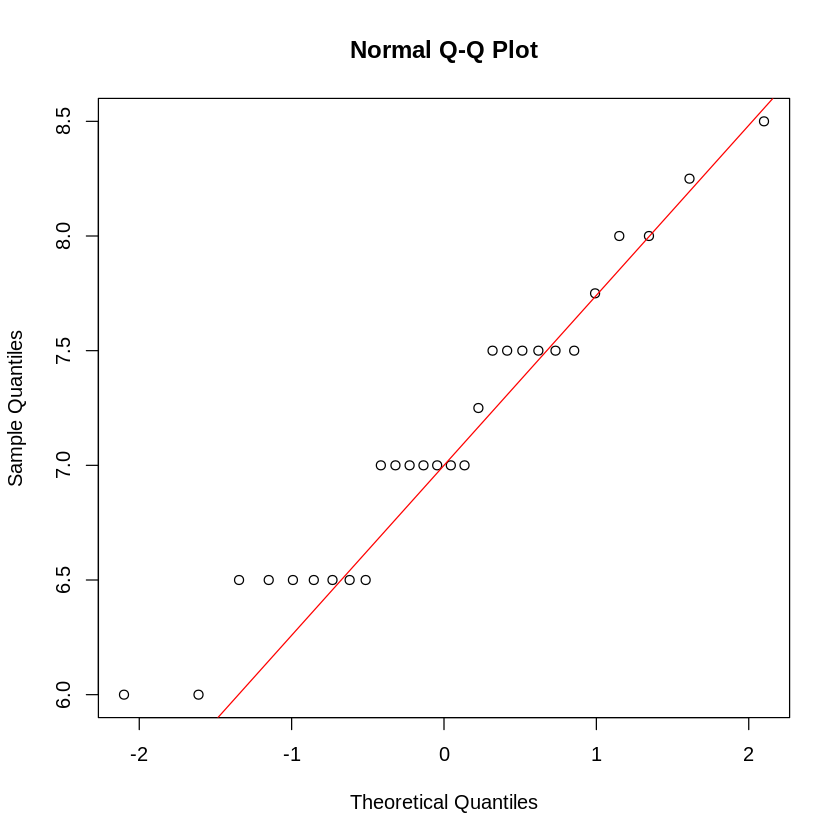

In [116]:
# Q-Q Plot for visual assessment of normality
qqnorm(df$Total_sleep_time)
qqline(df$Total_sleep_time, col = "red")  # Add reference line

#### Heteroscedasticity
Levene's Test: robust to non-normal data

In [117]:
# Perform Levene's test
levene_test_result_SleepDuration <- leveneTest(Total_sleep_time ~ Group, data = df, center=median)
print(levene_test_result_SleepDuration)

# Interpret the p-value
if (levene_test_result_SleepDuration$`Pr(>F)`[1] < 0.05) {
  cat("P is less than 0.05, indicating that there are significant differences in variances across groups.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the variances are equal across groups.\nA parametric test can be used.\n")
}

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value  Pr(>F)  
group  3  2.6863 0.06917 .
      24                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
P is greater than or equal to 0.05, indicating that the variances are equal across groups.
A parametric test can be used.


### One-way ANOVA

In [118]:
# Run One-Way ANOVA
anova_result_Total_sleep_time <- aov(Total_sleep_time ~ Group, data = df)

# Print ANOVA summary
anova_summary_Total_sleep_time <- summary(anova_result_Total_sleep_time)
print(anova_summary_Total_sleep_time)

# Check p-value of ANOVA
p_value_Total_sleep_time <- anova_summary_Total_sleep_time[[1]]["Pr(>F)"][1, 1]  # Extract the p-value from ANOVA summary

# Function to perform Post Hoc Tests only if ANOVA p-value < 0.05
if (p_value_Total_sleep_time < 0.05) {
  cat("ANOVA is significant (p =", round(p_value_Total_sleep_time, 4),"). Therefore, run post hoc tests...\n")
  post_hoc_result_Total_sleep_time <- TukeyHSD(anova_result_Total_sleep_time)

  # Print the results of the post hoc tests
  print(post_hoc_result_Total_sleep_time)

  # Visualize the results
  plot(post_hoc_result_Total_sleep_time)
} else {
  cat("ANOVA is not significant (p =", round(p_value_Total_sleep_time, 4),"). No post hoc tests will be run.\n")
}

            Df Sum Sq Mean Sq F value Pr(>F)
Group        3  0.453  0.1510   0.334  0.801
Residuals   24 10.857  0.4524               
ANOVA is not significant (p = 0.8009 ). No post hoc tests will be run.


## Sleep onset latency

#### Normality
Shapiro-Wilk Test: Good for small to moderate sample sizes. <br>
Q-Q Plot: A visual method to assess normality.

In [119]:
# Perform Shapiro-Wilk test for normality on Sleep_quality
shapiro_test_result_SleepOnsetLatency <- shapiro.test(df$Sleep_onset_latency)

# Print the result
print(shapiro_test_result_SleepOnsetLatency)

# Interpret the p-value
if (shapiro_test_result_SleepOnsetLatency$p.value < 0.05) {
  cat("P is less than 0.05, indicating that the data deviates from a normal distribution.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.\nThe data do not need to be scaled and a parametric test can be used.\n")
}


	Shapiro-Wilk normality test

data:  df$Sleep_onset_latency
W = 0.69081, p-value = 2.118e-06

P is less than 0.05, indicating that the data deviates from a normal distribution.
A nonparametric test should be used, or the data should be scaled before using a parametric test.


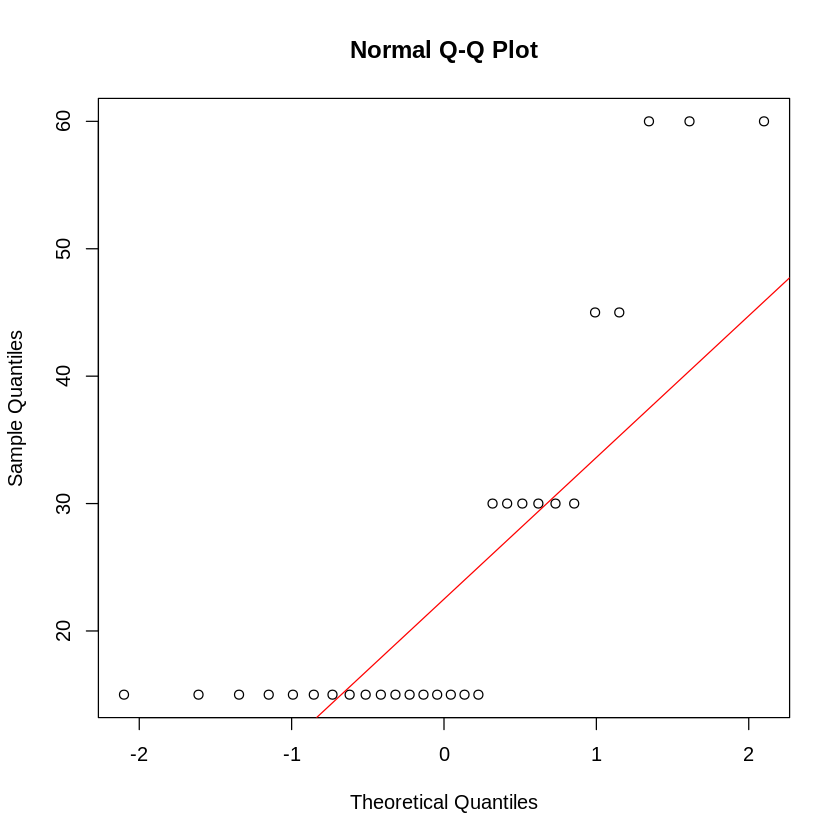

In [120]:
# Q-Q Plot for visual assessment of normality
qqnorm(df$Sleep_onset_latency)
qqline(df$Sleep_onset_latency, col = "red")  # Add reference line

#### Heteroscedasticity
Levene's Test: robust to non-normal data

In [121]:
# Perform Levene's test
levene_test_result_SleepOnsetLatency <- leveneTest(Sleep_onset_latency ~ Group, data = df, center=median)
print(levene_test_result_SleepOnsetLatency)

# Interpret the p-value
if (levene_test_result_SleepOnsetLatency$`Pr(>F)`[1] < 0.05) {
  cat("P is less than 0.05, indicating that there are significant differences in variances across groups.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the variances are equal across groups.\nA parametric test can be used.\n")
}

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  3  2.1176 0.1245
      24               
P is greater than or equal to 0.05, indicating that the variances are equal across groups.
A parametric test can be used.


Because the sleep onset latency data is not normally distributed, need to transform the data.

### Transform the sleep onset latency data
For continuous data, it is most appropriate to log transform. But, first need to check that there are no non-positive numbers because you cannot log transform zero or negative numbers.

In [122]:
# Check for negative values in Sleep_onset_latency
if (any(df$Sleep_onset_latency < 0)) {
  cat("There are negative values in Sleep_onset_latency. Please address them before log transformation.\n")
} else {
  # Perform log transformation (base e or natural log)
  df <- df %>%
    mutate(Sleep_onset_latency_log = log(Sleep_onset_latency))

  # Print the first few rows of the transformed data
  head(df)
}

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_percent,Sleep_onset_latency_log
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
1,1,3.5,1,1,2,1.0,1,2,13,1,⋯,0,1,1410,60,7.0,4,1,Binaural Beats,33.33333,4.094345
2,2,5.0,0,1,2,2.0,1,1,14,1,⋯,0,1,1410,30,6.5,1,2,Binaural Beats,66.66667,3.401197
3,3,6.0,1,1,4,1.5,1,1,15,0,⋯,0,1,1530,15,7.0,2,2,Binaural Beats,66.66667,2.708050
4,4,3.0,0,1,2,6.0,1,2,9,0,⋯,0,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050
5,5,3.5,1,0,0,0.0,1,1,15,0,⋯,0,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050
6,6,3.0,1,0,0,0.0,1,1,14,1,⋯,0,1,1410,15,6.5,2,1,Binaural Beats,33.33333,2.708050


### One-way ANOVA

In [123]:
# Run One-Way ANOVA
anova_result_Sleep_onset_latency_log <- aov(Sleep_onset_latency_log ~ Group, data = df)

# Print ANOVA summary
anova_summary_Sleep_onset_latency_log <- summary(anova_result_Sleep_onset_latency_log)
print(anova_summary_Sleep_onset_latency_log)

# Check p-value of ANOVA
p_value_Sleep_onset_latency_log <- anova_summary_Sleep_onset_latency_log[[1]]["Pr(>F)"][1, 1]  # Extract the p-value from ANOVA summary

# Function to perform Post Hoc Tests only if ANOVA p-value < 0.05
if (p_value_Sleep_onset_latency_log < 0.05) {
  cat("ANOVA is significant (p =", round(p_value_Sleep_onset_latency_log, 4),"). Therefore, run post hoc tests...\n")
  post_hoc_result_Sleep_onset_latency_log <- TukeyHSD(anova_result_Sleep_onset_latency_log)

  # Print the results of the post hoc tests
  print(post_hoc_result_Sleep_onset_latency_log)

  # Visualize the results
  plot(post_hoc_result_Sleep_onset_latency_log)
} else {
  cat("ANOVA is not significant (p =", round(p_value_Sleep_onset_latency_log, 4),"). No post hoc tests will be run.\n")
}

            Df Sum Sq Mean Sq F value Pr(>F)
Group        3  1.019  0.3398   1.338  0.285
Residuals   24  6.094  0.2539               
ANOVA is not significant (p = 0.2854 ). No post hoc tests will be run.


## Wakefullness

#### Normality
Shapiro-Wilk Test: Good for small to moderate sample sizes. <br>
Q-Q Plot: A visual method to assess normality.

In [124]:
# Perform Shapiro-Wilk test for normality on Sleep_quality
shapiro_test_result_Wakefullness <- shapiro.test(df$Wakefulness_after_sleep_onset)

# Print the result
print(shapiro_test_result_Wakefullness)

# Interpret the p-value
if (shapiro_test_result_Wakefullness$p.value < 0.05) {
  cat("P is less than 0.05, indicating that the data deviates from a normal distribution.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the data does not deviate from a normal distribution.\nThe data do not need to be scaled and a parametric test can be used.\n")
}


	Shapiro-Wilk normality test

data:  df$Wakefulness_after_sleep_onset
W = 0.82201, p-value = 0.0002676

P is less than 0.05, indicating that the data deviates from a normal distribution.
A nonparametric test should be used, or the data should be scaled before using a parametric test.


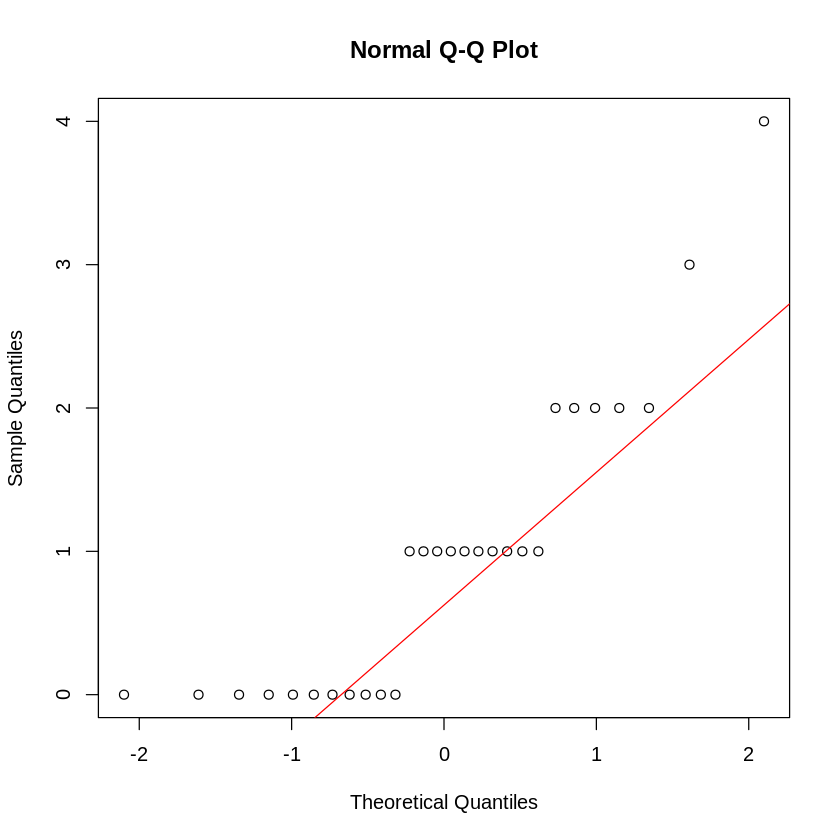

In [125]:
# Q-Q Plot for visual assessment of normality
qqnorm(df$Wakefulness_after_sleep_onset)
qqline(df$Wakefulness_after_sleep_onset, col = "red")  # Add reference line

#### Heteroscedasticity
Levene's Test: robust to non-normal data

In [126]:
# Perform Levene's test
levene_test_result_Wakefullness <- leveneTest(Wakefulness_after_sleep_onset ~ Group, data = df, center=median)
print(levene_test_result_Wakefullness)

# Interpret the p-value
if (levene_test_result_Wakefullness$`Pr(>F)`[1] < 0.05) {
  cat("P is less than 0.05, indicating that there are significant differences in variances across groups.\nA nonparametric test should be used, or the data should be scaled before using a parametric test.\n")
} else {
  cat("P is greater than or equal to 0.05, indicating that the variances are equal across groups.\nA parametric test can be used.\n")
}

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  3    1.02 0.4012
      24               
P is greater than or equal to 0.05, indicating that the variances are equal across groups.
A parametric test can be used.


Because the wakefullness data is psychometric and because it is not normally distributed, need to transform the data.

### Transform the wakefullness data
For psychometric data, it is most appropriate to transform to a percent of maximum value.

In [127]:
# Transform Wakefulness_after_sleep_onset to a percentage of maximum value (4)
df <- df %>%
  mutate(Wakefullness_percent = (Wakefulness_after_sleep_onset / 4 * 100))

# Print the first few rows of the transformed data
head(df)

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_percent,Sleep_onset_latency_log,Wakefullness_percent
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,1,3.5,1,1,2,1.0,1,2,13,1,⋯,1,1410,60,7.0,4,1,Binaural Beats,33.33333,4.094345,100
2,2,5.0,0,1,2,2.0,1,1,14,1,⋯,1,1410,30,6.5,1,2,Binaural Beats,66.66667,3.401197,25
3,3,6.0,1,1,4,1.5,1,1,15,0,⋯,1,1530,15,7.0,2,2,Binaural Beats,66.66667,2.708050,50
4,4,3.0,0,1,2,6.0,1,2,9,0,⋯,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050,0
5,5,3.5,1,0,0,0.0,1,1,15,0,⋯,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050,0
6,6,3.0,1,0,0,0.0,1,1,14,1,⋯,1,1410,15,6.5,2,1,Binaural Beats,33.33333,2.708050,50


### One-way ANOVA

In [128]:
# Run One-Way ANOVA
anova_result_Wakefullness_percent <- aov(Wakefullness_percent ~ Group, data = df)

# Print ANOVA summary
anova_summary_Wakefullness_percent <- summary(anova_result_Wakefullness_percent)
print(anova_summary_Wakefullness_percent)

# Check p-value of ANOVA
p_value_Wakefullness_percent <- anova_summary_Wakefullness_percent[[1]]["Pr(>F)"][1, 1]  # Extract the p-value from ANOVA summary

# Function to perform Post Hoc Tests only if ANOVA p-value < 0.05
if (p_value_Wakefullness_percent < 0.05) {
  cat("ANOVA is significant (p =", round(p_value_Wakefullness_percent, 4),"). Therefore, run post hoc tests...\n")
  post_hoc_result_Wakefullness_percent <- TukeyHSD(anova_result_Wakefullness_percent)

  # Print the results of the post hoc tests
  print(post_hoc_result_Wakefullness_percent)

  # Visualize the results
  plot(post_hoc_result_Wakefullness_percent)
} else {
  cat("ANOVA is not significant (p =", round(p_value_Wakefullness_percent, 4),"). No post hoc tests will be run.\n")
}

            Df Sum Sq Mean Sq F value Pr(>F)
Group        3   3817  1272.3   2.138  0.122
Residuals   24  14286   595.2               
ANOVA is not significant (p = 0.1219 ). No post hoc tests will be run.


## Interpretation of ANOVA results
One-way ANOVA found that the null hypothesis was not rejected (P>0.05) for any of the 4 variables (sleep duration, sleep quality, sleep latency onset, or wakefullness), i.e., the between-group differences were not statistically significant at the 5% level. Therefore, I conclude that neither pre-bed melatonin nor pre-bed binaural beats influenced my sleep duration or quality.

## Effect sizes for the between group comparisons
To further interpret the data, I also calculated Cohen's d, a measure of effect size used to indicate the standardized difference between two means. Cohen's d values were interpreted to infer trivial (d<0.20), small (0.20≤d<0.50), moderate (0.50≤d<0.80), or large effects (d≥0.80).
<br><br>
The ANOVA table also generates Eta-squared (η²), a type of effect size that is interpreted to infer a trivial (η²<0.01), small (0.01≤η²<0.06), medium (0.06≤η²<0.14), or large effect (η²≥0.14).

### Sleep quality

In [129]:
# Calculate mean, standard deviation, and sample size for Sleep_quality_percent in all groups
group_stats <- df %>%
  group_by(Group) %>%
  summarise(
    mean_value = mean(Sleep_quality_percent, na.rm = TRUE),
    sd_value = sd(Sleep_quality_percent, na.rm = TRUE),
    n_value = n()
  )

# Extract the data
meanControl_Sleep_quality_percent <- group_stats %>% filter(Group == "Control") %>% pull(mean_value)
sdControl_Sleep_quality_percent <- group_stats %>% filter(Group == "Control") %>% pull(sd_value)
nControl_Sleep_quality_percent <- group_stats %>% filter(Group == "Control") %>% pull(n_value)

meanMelotonin_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin") %>% pull(mean_value)
sdMelotonin_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin") %>% pull(sd_value)
nMelotonin_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin") %>% pull(n_value)

meanBinaural_Beats_Sleep_quality_percent <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(mean_value)
sdBinaural_Beats_Sleep_quality_percent <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(sd_value)
nBinaural_Beats_Sleep_quality_percent <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(n_value)

meanMelotoninBinauralBeats_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(mean_value)
sdMelotoninBinauralBeats_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(sd_value)
nMelotoninBinauralBeats_Sleep_quality_percent <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(n_value)

# Calculate pooled standard deviation
pooled_sd_Sleep_quality_percent <- sqrt(((nControl_Sleep_quality_percent - 1) * sdControl_Sleep_quality_percent^2 +
                                        (nMelotonin_Sleep_quality_percent - 1) * sdMelotonin_Sleep_quality_percent^2 +
                                        (nBinaural_Beats_Sleep_quality_percent - 1) * sdBinaural_Beats_Sleep_quality_percent^2 +
                                        (nMelotoninBinauralBeats_Sleep_quality_percent - 1) * sdMelotoninBinauralBeats_Sleep_quality_percent^2) /
                                        (nControl_Sleep_quality_percent + nMelotonin_Sleep_quality_percent + nBinaural_Beats_Sleep_quality_percent + nMelotoninBinauralBeats_Sleep_quality_percent - 4))

# Calculate Cohen's d
cohen_d_Sleep_quality_percent_MelotoninVsControl <- (meanMelotonin_Sleep_quality_percent - meanControl_Sleep_quality_percent) / pooled_sd_Sleep_quality_percent
cohen_d_Sleep_quality_percent_BeatsVsControl <- (meanBinaural_Beats_Sleep_quality_percent - meanControl_Sleep_quality_percent) / pooled_sd_Sleep_quality_percent
cohen_d_Sleep_quality_percent_BothVsControl <- (meanMelotoninBinauralBeats_Sleep_quality_percent - meanControl_Sleep_quality_percent) / pooled_sd_Sleep_quality_percent

# Function to interpret Cohen's d
interpret_cohens_d <- function(d) {
  if (-0.2 < d && d < 0.20) {
    return("(a trivial effect; d < ±0.20).")
  } else if (0.20 <= d && d < 0.50) {
    return("(a small effect; 0.20 ≤ d < 0.50).")
  } else if (0.5 <= d && d < 0.80) {
    return("(a moderate effect; 0.50 ≤ d < 0.80).")
  } else if (d >= 0.80) {
    return("(a large effect; d ≥ 0.80).")
  } else if (-0.50 <= d && d < -0.20) {
    return("(a small effect; -0.50 ≤ d < -0.20).")
  } else if (-0.80 <= d && d < -0.50) {
    return("(a moderate effect; -0.80 ≤ d < -0.50).")
  } else if (d <= -0.80) {
    return("(a large effect; d ≤ -0.80).")
  }
}

# Print Cohen's d values with interpretation
cat("Cohen's d (Melotonin vs. Control) =", round(cohen_d_Sleep_quality_percent_MelotoninVsControl, 3),
    interpret_cohens_d(cohen_d_Sleep_quality_percent_MelotoninVsControl), "\n\n")

cat("Cohen's d (Binaural Beats vs. Control) =", round(cohen_d_Sleep_quality_percent_BeatsVsControl, 3),
    interpret_cohens_d(cohen_d_Sleep_quality_percent_BeatsVsControl), "\n\n")

cat("Cohen's d (Melotonin + Binaural Beats vs. Control) =", round(cohen_d_Sleep_quality_percent_BothVsControl, 3),
    interpret_cohens_d(cohen_d_Sleep_quality_percent_BothVsControl), "\n\n")

Cohen's d (Melotonin vs. Control) = 0.579 (a moderate effect; 0.50 ≤ d < 0.80). 

Cohen's d (Binaural Beats vs. Control) = 0.579 (a moderate effect; 0.50 ≤ d < 0.80). 

Cohen's d (Melotonin + Binaural Beats vs. Control) = 0.965 (a large effect; d ≥ 0.80). 



In [130]:
# Calculate eta-squared for Sleep quality
ss_effect_Sleep_quality_percent <- anova_summary_Sleep_quality_percent[[1]][1, "Sum Sq"]  # Sum of squares for the effect
ss_total_Sleep_quality_percent <- sum(anova_summary_Sleep_quality_percent[[1]][, "Sum Sq"])  # Total sum of squares
eta_squared_Sleep_quality_percent <- ss_effect_Sleep_quality_percent / ss_total_Sleep_quality_percent  # Calculate eta-squared

# Print eta-squared result
cat("Eta-squared (η²) =", round(eta_squared_Sleep_quality_percent, 3))

# Print and interpret eta-squared
if (eta_squared_Sleep_quality_percent < 0.01) {
  cat(" (a trivial effect; η² < 0.01)\n")
} else if (eta_squared_Sleep_quality_percent < 0.06) {
  cat(" (a small effect; 0.01 ≤ η² < 0.06)\n")
} else if (eta_squared_Sleep_quality_percent < 0.14) {
  cat(" (a moderate effect; 0.06 ≤ η² < 0.14)\n")
} else {
  cat(" (a large effect; η² ≥ 0.14)\n")
}

Eta-squared (η²) = 0.122 (a moderate effect; 0.06 ≤ η² < 0.14)


### Sleep duration

In [131]:
# Calculate mean, standard deviation, and sample size for Total_sleep_time in all groups
group_stats <- df %>%
  group_by(Group) %>%
  summarise(
    mean_value = mean(Total_sleep_time, na.rm = TRUE),
    sd_value = sd(Total_sleep_time, na.rm = TRUE),
    n_value = n()
  )

# Extract the data
meanControl_Total_sleep_time <- group_stats %>% filter(Group == "Control") %>% pull(mean_value)
sdControl_Total_sleep_time <- group_stats %>% filter(Group == "Control") %>% pull(sd_value)
nControl_Total_sleep_time <- group_stats %>% filter(Group == "Control") %>% pull(n_value)

meanMelotonin_Total_sleep_time <- group_stats %>% filter(Group == "Melotonin") %>% pull(mean_value)
sdMelotonin_Total_sleep_time <- group_stats %>% filter(Group == "Melotonin") %>% pull(sd_value)
nMelotonin_Total_sleep_time <- group_stats %>% filter(Group == "Melotonin") %>% pull(n_value)

meanBinaural_Beats_Total_sleep_time <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(mean_value)
sdBinaural_Beats_Total_sleep_time <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(sd_value)
nBinaural_Beats_Total_sleep_time <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(n_value)

meanMelotoninBinauralBeats_Total_sleep_time <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(mean_value)
sdMelotoninBinauralBeats_Total_sleep_time <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(sd_value)
nMelotoninBinauralBeats_Total_sleep_time <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(n_value)

# Calculate pooled standard deviation
pooled_sd_Total_sleep_time <- sqrt(((nControl_Total_sleep_time - 1) * sdControl_Total_sleep_time^2 +
                                        (nMelotonin_Total_sleep_time - 1) * sdMelotonin_Total_sleep_time^2 +
                                        (nBinaural_Beats_Total_sleep_time - 1) * sdBinaural_Beats_Total_sleep_time^2 +
                                        (nMelotoninBinauralBeats_Total_sleep_time - 1) * sdMelotoninBinauralBeats_Total_sleep_time^2) /
                                        (nControl_Total_sleep_time + nMelotonin_Total_sleep_time + nBinaural_Beats_Total_sleep_time + nMelotoninBinauralBeats_Total_sleep_time - 4))

# Calculate Cohen's d
cohen_d_Total_sleep_time_MelotoninVsControl <- (meanMelotonin_Total_sleep_time - meanControl_Total_sleep_time) / pooled_sd_Total_sleep_time
cohen_d_Total_sleep_time_BeatsVsControl <- (meanBinaural_Beats_Total_sleep_time - meanControl_Total_sleep_time) / pooled_sd_Total_sleep_time
cohen_d_Total_sleep_time_BothVsControl <- (meanMelotoninBinauralBeats_Total_sleep_time - meanControl_Total_sleep_time) / pooled_sd_Total_sleep_time

# Function to interpret Cohen's d
interpret_cohens_d <- function(d) {
  if (-0.2 < d && d < 0.20) {
    return("(a trivial effect; d < ±0.20).")
  } else if (0.20 <= d && d < 0.50) {
    return("(a small effect; 0.20 ≤ d < 0.50).")
  } else if (0.5 <= d && d < 0.80) {
    return("(a moderate effect; 0.50 ≤ d < 0.80).")
  } else if (d >= 0.80) {
    return("(a large effect; d ≥ 0.80).")
  } else if (-0.50 <= d && d < -0.20) {
    return("(a small effect; -0.50 ≤ d < -0.20).")
  } else if (-0.80 <= d && d < -0.50) {
    return("(a moderate effect; -0.80 ≤ d < -0.50).")
  } else if (d <= -0.80) {
    return("(a large effect; d ≤ -0.80).")
  }
}

# Print Cohen's d values with interpretation
cat("Cohen's d (Melotonin vs. Control) =", round(cohen_d_Total_sleep_time_MelotoninVsControl, 3),
    interpret_cohens_d(cohen_d_Total_sleep_time_MelotoninVsControl), "\n\n")

cat("Cohen's d (Binaural Beats vs. Control) =", round(cohen_d_Total_sleep_time_BeatsVsControl, 3),
    interpret_cohens_d(cohen_d_Total_sleep_time_BeatsVsControl), "\n\n")

cat("Cohen's d (Melotonin + Binaural Beats vs. Control) =", round(cohen_d_Total_sleep_time_BothVsControl, 3),
    interpret_cohens_d(cohen_d_Total_sleep_time_BothVsControl), "\n\n")

Cohen's d (Melotonin vs. Control) = -0.212 (a small effect; -0.50 ≤ d < -0.20). 

Cohen's d (Binaural Beats vs. Control) = -0.425 (a small effect; -0.50 ≤ d < -0.20). 

Cohen's d (Melotonin + Binaural Beats vs. Control) = 0.053 (a trivial effect; d < ±0.20). 



In [132]:
# Calculate eta-squared for Sleep quality
ss_effect_Total_sleep_time <- anova_summary_Total_sleep_time[[1]][1, "Sum Sq"]  # Sum of squares for the effect
ss_total_Total_sleep_time <- sum(anova_summary_Total_sleep_time[[1]][, "Sum Sq"])  # Total sum of squares
eta_squared_Total_sleep_time <- ss_effect_Total_sleep_time / ss_total_Total_sleep_time  # Calculate eta-squared

# Print eta-squared result
cat("Eta-squared (η²) =", round(eta_squared_Total_sleep_time, 3))

# Print and interpret eta-squared
if (eta_squared_Total_sleep_time < 0.01) {
  cat(" (a trivial effect; η² < 0.01)\n")
} else if (eta_squared_Total_sleep_time < 0.06) {
  cat(" (a small effect; 0.01 ≤ η² < 0.06)\n")
} else if (eta_squared_Total_sleep_time < 0.14) {
  cat(" (a moderate effect; 0.06 ≤ η² < 0.14)\n")
} else {
  cat(" (a large effect; η² ≥ 0.14)\n")
}

Eta-squared (η²) = 0.04 (a small effect; 0.01 ≤ η² < 0.06)


### Sleep onset latency

In [133]:
# Calculate mean, standard deviation, and sample size for Sleep_onset_latency_log in all groups
group_stats <- df %>%
  group_by(Group) %>%
  summarise(
    mean_value = mean(Sleep_onset_latency_log, na.rm = TRUE),
    sd_value = sd(Sleep_onset_latency_log, na.rm = TRUE),
    n_value = n()
  )

# Extract the data
meanControl_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Control") %>% pull(mean_value)
sdControl_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Control") %>% pull(sd_value)
nControl_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Control") %>% pull(n_value)

meanMelotonin_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Melotonin") %>% pull(mean_value)
sdMelotonin_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Melotonin") %>% pull(sd_value)
nMelotonin_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Melotonin") %>% pull(n_value)

meanBinaural_Beats_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(mean_value)
sdBinaural_Beats_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(sd_value)
nBinaural_Beats_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(n_value)

meanMelotoninBinauralBeats_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(mean_value)
sdMelotoninBinauralBeats_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(sd_value)
nMelotoninBinauralBeats_Sleep_onset_latency_log <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(n_value)

# Calculate pooled standard deviation
pooled_sd_Sleep_onset_latency_log <- sqrt(((nControl_Sleep_onset_latency_log - 1) * sdControl_Sleep_onset_latency_log^2 +
                                        (nMelotonin_Sleep_onset_latency_log - 1) * sdMelotonin_Sleep_onset_latency_log^2 +
                                        (nBinaural_Beats_Sleep_onset_latency_log - 1) * sdBinaural_Beats_Sleep_onset_latency_log^2 +
                                        (nMelotoninBinauralBeats_Sleep_onset_latency_log - 1) * sdMelotoninBinauralBeats_Sleep_onset_latency_log^2) /
                                        (nControl_Sleep_onset_latency_log + nMelotonin_Sleep_onset_latency_log + nBinaural_Beats_Sleep_onset_latency_log + nMelotoninBinauralBeats_Sleep_onset_latency_log - 4))

# Calculate Cohen's d
cohen_d_Sleep_onset_latency_log_MelotoninVsControl <- (meanMelotonin_Sleep_onset_latency_log - meanControl_Sleep_onset_latency_log) / pooled_sd_Sleep_onset_latency_log
cohen_d_Sleep_onset_latency_log_BeatsVsControl <- (meanBinaural_Beats_Sleep_onset_latency_log - meanControl_Sleep_onset_latency_log) / pooled_sd_Sleep_onset_latency_log
cohen_d_Sleep_onset_latency_log_BothVsControl <- (meanMelotoninBinauralBeats_Sleep_onset_latency_log - meanControl_Sleep_onset_latency_log) / pooled_sd_Sleep_onset_latency_log

# Function to interpret Cohen's d
interpret_cohens_d <- function(d) {
  if (-0.2 < d && d < 0.20) {
    return("(a trivial effect; d < ±0.20).")
  } else if (0.20 <= d && d < 0.50) {
    return("(a small effect; 0.20 ≤ d < 0.50).")
  } else if (0.5 <= d && d < 0.80) {
    return("(a moderate effect; 0.50 ≤ d < 0.80).")
  } else if (d >= 0.80) {
    return("(a large effect; d ≥ 0.80).")
  } else if (-0.50 <= d && d < -0.20) {
    return("(a small effect; -0.50 ≤ d < -0.20).")
  } else if (-0.80 <= d && d < -0.50) {
    return("(a moderate effect; -0.80 ≤ d < -0.50).")
  } else if (d <= -0.80) {
    return("(a large effect; d ≤ -0.80).")
  }
}

# Print Cohen's d values with interpretation
cat("Cohen's d (Melotonin vs. Control) =", round(cohen_d_Sleep_onset_latency_log_MelotoninVsControl, 3),
    interpret_cohens_d(cohen_d_Sleep_onset_latency_log_MelotoninVsControl), "\n\n")

cat("Cohen's d (Binaural Beats vs. Control) =", round(cohen_d_Sleep_onset_latency_log_BeatsVsControl, 3),
    interpret_cohens_d(cohen_d_Sleep_onset_latency_log_BeatsVsControl), "\n\n")

cat("Cohen's d (Melotonin + Binaural Beats vs. Control) =", round(cohen_d_Sleep_onset_latency_log_BothVsControl, 3),
    interpret_cohens_d(cohen_d_Sleep_onset_latency_log_BothVsControl), "\n\n")

Cohen's d (Melotonin vs. Control) = -0.901 (a large effect; d ≤ -0.80). 

Cohen's d (Binaural Beats vs. Control) = -0.393 (a small effect; -0.50 ≤ d < -0.20). 

Cohen's d (Melotonin + Binaural Beats vs. Control) = -0.901 (a large effect; d ≤ -0.80). 



In [134]:
# Calculate eta-squared for Sleep quality
ss_effect_Sleep_onset_latency_log <- anova_summary_Sleep_onset_latency_log[[1]][1, "Sum Sq"]  # Sum of squares for the effect
ss_total_Sleep_onset_latency_log <- sum(anova_summary_Sleep_onset_latency_log[[1]][, "Sum Sq"])  # Total sum of squares
eta_squared_Sleep_onset_latency_log <- ss_effect_Sleep_onset_latency_log / ss_total_Sleep_onset_latency_log  # Calculate eta-squared

# Print eta-squared result
cat("Eta-squared (η²) =", round(eta_squared_Sleep_onset_latency_log, 3))

# Print and interpret eta-squared
if (eta_squared_Sleep_onset_latency_log < 0.01) {
  cat(" (a trivial effect; η² < 0.01)\n")
} else if (eta_squared_Sleep_onset_latency_log < 0.06) {
  cat(" (a small effect; 0.01 ≤ η² < 0.06)\n")
} else if (eta_squared_Sleep_onset_latency_log < 0.14) {
  cat(" (a moderate effect; 0.06 ≤ η² < 0.14)\n")
} else {
  cat(" (a large effect; η² ≥ 0.14)\n")
}

Eta-squared (η²) = 0.143 (a large effect; η² ≥ 0.14)


### Wakefullness

In [135]:
# Calculate mean, standard deviation, and sample size for Wakefullness_percent in all groups
group_stats <- df %>%
  group_by(Group) %>%
  summarise(
    mean_value = mean(Wakefullness_percent, na.rm = TRUE),
    sd_value = sd(Wakefullness_percent, na.rm = TRUE),
    n_value = n()
  )

# Extract the data
meanControl_Wakefullness_percent <- group_stats %>% filter(Group == "Control") %>% pull(mean_value)
sdControl_Wakefullness_percent <- group_stats %>% filter(Group == "Control") %>% pull(sd_value)
nControl_Wakefullness_percent <- group_stats %>% filter(Group == "Control") %>% pull(n_value)

meanMelotonin_Wakefullness_percent <- group_stats %>% filter(Group == "Melotonin") %>% pull(mean_value)
sdMelotonin_Wakefullness_percent <- group_stats %>% filter(Group == "Melotonin") %>% pull(sd_value)
nMelotonin_Wakefullness_percent <- group_stats %>% filter(Group == "Melotonin") %>% pull(n_value)

meanBinaural_Beats_Wakefullness_percent <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(mean_value)
sdBinaural_Beats_Wakefullness_percent <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(sd_value)
nBinaural_Beats_Wakefullness_percent <- group_stats %>% filter(Group == "Binaural Beats") %>% pull(n_value)

meanMelotoninBinauralBeats_Wakefullness_percent <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(mean_value)
sdMelotoninBinauralBeats_Wakefullness_percent <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(sd_value)
nMelotoninBinauralBeats_Wakefullness_percent <- group_stats %>% filter(Group == "Melotonin + Binaural Beats") %>% pull(n_value)

# Calculate pooled standard deviation
pooled_sd_Wakefullness_percent <- sqrt(((nControl_Wakefullness_percent - 1) * sdControl_Wakefullness_percent^2 +
                                        (nMelotonin_Wakefullness_percent - 1) * sdMelotonin_Wakefullness_percent^2 +
                                        (nBinaural_Beats_Wakefullness_percent - 1) * sdBinaural_Beats_Wakefullness_percent^2 +
                                        (nMelotoninBinauralBeats_Wakefullness_percent - 1) * sdMelotoninBinauralBeats_Wakefullness_percent^2) /
                                        (nControl_Wakefullness_percent + nMelotonin_Wakefullness_percent + nBinaural_Beats_Wakefullness_percent + nMelotoninBinauralBeats_Wakefullness_percent - 4))

# Calculate Cohen's d
cohen_d_Wakefullness_percent_MelotoninVsControl <- (meanMelotonin_Wakefullness_percent - meanControl_Wakefullness_percent) / pooled_sd_Wakefullness_percent
cohen_d_Wakefullness_percent_BeatsVsControl <- (meanBinaural_Beats_Wakefullness_percent - meanControl_Wakefullness_percent) / pooled_sd_Wakefullness_percent
cohen_d_Wakefullness_percent_BothVsControl <- (meanMelotoninBinauralBeats_Wakefullness_percent - meanControl_Wakefullness_percent) / pooled_sd_Wakefullness_percent

# Function to interpret Cohen's d
interpret_cohens_d <- function(d) {
  if (-0.2 < d && d < 0.20) {
    return("(a trivial effect; d < ±0.20).")
  } else if (0.20 <= d && d < 0.50) {
    return("(a small effect; 0.20 ≤ d < 0.50).")
  } else if (0.5 <= d && d < 0.80) {
    return("(a moderate effect; 0.50 ≤ d < 0.80).")
  } else if (d >= 0.80) {
    return("(a large effect; d ≥ 0.80).")
  } else if (-0.50 <= d && d < -0.20) {
    return("(a small effect; -0.50 ≤ d < -0.20).")
  } else if (-0.80 <= d && d < -0.50) {
    return("(a moderate effect; -0.80 ≤ d < -0.50).")
  } else if (d <= -0.80) {
    return("(a large effect; d ≤ -0.80).")
  }
}

# Print Cohen's d values with interpretation
cat("Cohen's d (Melotonin vs. Control) =", round(cohen_d_Wakefullness_percent_MelotoninVsControl, 3),
    interpret_cohens_d(cohen_d_Wakefullness_percent_MelotoninVsControl), "\n\n")

cat("Cohen's d (Binaural Beats vs. Control) =", round(cohen_d_Wakefullness_percent_BeatsVsControl, 3),
    interpret_cohens_d(cohen_d_Wakefullness_percent_BeatsVsControl), "\n\n")

cat("Cohen's d (Melotonin + Binaural Beats vs. Control) =", round(cohen_d_Wakefullness_percent_BothVsControl, 3),
    interpret_cohens_d(cohen_d_Wakefullness_percent_BothVsControl), "\n\n")

Cohen's d (Melotonin vs. Control) = -1.025 (a large effect; d ≤ -0.80). 

Cohen's d (Binaural Beats vs. Control) = 0 (a trivial effect; d < ±0.20). 

Cohen's d (Melotonin + Binaural Beats vs. Control) = -0.878 (a large effect; d ≤ -0.80). 



In [136]:
# Calculate eta-squared for Sleep quality
ss_effect_Wakefullness_percent <- anova_summary_Wakefullness_percent[[1]][1, "Sum Sq"]  # Sum of squares for the effect
ss_total_Wakefullness_percent <- sum(anova_summary_Wakefullness_percent[[1]][, "Sum Sq"])  # Total sum of squares
eta_squared_Wakefullness_percent <- ss_effect_Wakefullness_percent / ss_total_Wakefullness_percent  # Calculate eta-squared

# Print eta-squared result
cat("Eta-squared (η²) =", round(eta_squared_Wakefullness_percent, 3))

# Print and interpret eta-squared
if (eta_squared_Wakefullness_percent < 0.01) {
  cat(" (a trivial effect; η² < 0.01)\n")
} else if (eta_squared_Wakefullness_percent < 0.06) {
  cat(" (a small effect; 0.01 ≤ η² < 0.06)\n")
} else if (eta_squared_Wakefullness_percent < 0.14) {
  cat(" (a moderate effect; 0.06 ≤ η² < 0.14)\n")
} else {
  cat(" (a large effect; η² ≥ 0.14)\n")
}

Eta-squared (η²) = 0.211 (a large effect; η² ≥ 0.14)


# Machine learning

Use and compare machine learning models to determine which independent variables best predict the dependent variable:
1. <em>Random Forest</em> is a good model for feature importance, and it can handle mixed types of independent variables (numeric, integer, and factors). The Random Forest model's variable importance plot will show which independent variables contribute most to predicting dependent variables.
2. <em>XGBRegressor</em> (Extreme Gradient Boosting regressor) model is a good model for feature importance when there are mixed types of independent variables (numeric, integer, and factors). Some columns in the dataframe (e.g. Alcohol_time_before_bed) contain NaN but SHOULD NOT BE REMOVED because when a related colummn, like Alcohol, = "No", the Alcohol_time_before_bed column is irrelevant and should be ignored. Many machine learning algorithms cannot handle this, but regressor algorithms like XGBoost and LightGBM can handle NaN and automatically learn the best way to split data when missing values are encountered. These models will internally decide how to handle missing data during training, so there's no need for explicit imputation.

## Prepare the Data

In [137]:
# View the updated DataFrame (includes the transformed variables)
head(df)

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,⋯,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_percent,Sleep_onset_latency_log,Wakefullness_percent
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,1,3.5,1,1,2,1.0,1,2,13,1,⋯,1,1410,60,7.0,4,1,Binaural Beats,33.33333,4.094345,100
2,2,5.0,0,1,2,2.0,1,1,14,1,⋯,1,1410,30,6.5,1,2,Binaural Beats,66.66667,3.401197,25
3,3,6.0,1,1,4,1.5,1,1,15,0,⋯,1,1530,15,7.0,2,2,Binaural Beats,66.66667,2.708050,50
4,4,3.0,0,1,2,6.0,1,2,9,0,⋯,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050,0
5,5,3.5,1,0,0,0.0,1,1,15,0,⋯,1,1410,15,7.0,0,3,Binaural Beats,100.00000,2.708050,0
6,6,3.0,1,0,0,0.0,1,1,14,1,⋯,1,1410,15,6.5,2,1,Binaural Beats,33.33333,2.708050,50


In [138]:
# View the data types
str(df)

'data.frame':	28 obs. of  36 variables:
 $ Day                               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 2.75 3 ...
 $ Post_dinner_snacks                : int  1 0 1 0 1 1 1 1 0 0 ...
 $ Alcohol                           : int  1 1 1 1 0 0 0 0 0 0 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 0 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 0 0 0 0 0 0 ...
 $ Caffeinated_drinks                : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 14 13.5 ...
 $ Chocolate                         : int  1 1 0 0 0 1 0 1 1 1 ...
 $ Chocolate_time_before_bed         : num  2 6 0 0 0 11 0 1.5 6 9.5 ...
 $ Phone_use_before_bed              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Phone_use_duration                : int  5 15 5 5 5 20 15 10 2 15 ...
 $ Phone_use_time_before_bed         : i

In [139]:
# Remove the following columns to create a new dataframe:
# Day, Group, Sleep_quality, Sleep_onset_latency, and Wakefulness_after_sleep_onset
# This leaves Sleep_quality_percent, Sleep_onset_latency_percent, Wakefulness_after_sleep_onset_percent, and Total_sleep_time as the independent variables
# Create a new dataframe excluding specific columns
df2 <- subset(df, select = -c(Day, Group, Sleep_quality, Sleep_onset_latency, Wakefulness_after_sleep_onset))
# View the updated DataFrame to ensure columns are dropped
head(df2)

,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,Chocolate_time_before_bed,⋯,Work_stress,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Total_sleep_time,Sleep_quality_percent,Sleep_onset_latency_log,Wakefullness_percent
,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.5,1,1,2,1.0,1,2,13,1,2,⋯,0,1,0,0,1,1410,7.0,33.33333,4.094345,100
2,5.0,0,1,2,2.0,1,1,14,1,6,⋯,2,1,0,0,1,1410,6.5,66.66667,3.401197,25
3,6.0,1,1,4,1.5,1,1,15,0,0,⋯,0,2,0,0,1,1530,7.0,66.66667,2.708050,50
4,3.0,0,1,2,6.0,1,2,9,0,0,⋯,0,1,0,0,1,1410,7.0,100.00000,2.708050,0
5,3.5,1,0,0,0.0,1,1,15,0,0,⋯,1,1,0,0,1,1410,7.0,100.00000,2.708050,0
6,3.0,1,0,0,0.0,1,1,14,1,11,⋯,1,1,0,0,1,1410,6.5,33.33333,2.708050,50


In [140]:
# Convert the following columns to a categorical variable where 0 = No/absence and 1 = Yes/presence:
# Post_dinner_snacks, Alcohol, Caffeinated_drinks, Chocolate, Phone_use_before_bed, Exercise,
# Did_I_go_outdoors_today, Direct_sunlight_for_30_mins, Work, Illness, Melotonin, and Binaural_beats
# Create the Columns to convert
cols_to_convert <- c(
  "Post_dinner_snacks", "Alcohol", "Caffeinated_drinks", "Chocolate",
  "Phone_use_before_bed", "Exercise", "Did_I_go_outdoors_today",
  "Direct_sunlight_for_30_mins", "Work", "Illness",
  "Melotonin", "Binaural_beats"
)

# Convert the specified columns to factors with levels "No" and "Yes"
df2[cols_to_convert] <- lapply(df2[cols_to_convert], function(x) {
  factor(x, levels = c(0, 1), labels = c("No", "Yes"))
})

# Verify the conversion
str(df2)

'data.frame':	28 obs. of  31 variables:
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 2.75 3 ...
 $ Post_dinner_snacks                : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 2 1 1 ...
 $ Alcohol                           : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 1 1 1 1 1 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 0 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 0 0 0 0 0 0 ...
 $ Caffeinated_drinks                : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 14 13.5 ...
 $ Chocolate                         : Factor w/ 2 levels "No","Yes": 2 2 1 1 1 2 1 2 2 2 ...
 $ Chocolate_time_before_bed         : num  2 6 0 0 0 11 0 1.5 6 9.5 ...
 $ Phone_use_before_bed              : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Phone_use_duration                : int  5 15 5 5

## Sleep quality

### Preprocess the data

In [141]:
# Remove specific columns using dplyr's select()
df2_Sleep_quality <- df2 %>%
  select(-Total_sleep_time, -Sleep_onset_latency_log, -Wakefullness_percent)

# Verify the new dataframe
str(df2_Sleep_quality)

'data.frame':	28 obs. of  28 variables:
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 2.75 3 ...
 $ Post_dinner_snacks                : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 2 1 1 ...
 $ Alcohol                           : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 1 1 1 1 1 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 0 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 0 0 0 0 0 0 ...
 $ Caffeinated_drinks                : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 14 13.5 ...
 $ Chocolate                         : Factor w/ 2 levels "No","Yes": 2 2 1 1 1 2 1 2 2 2 ...
 $ Chocolate_time_before_bed         : num  2 6 0 0 0 11 0 1.5 6 9.5 ...
 $ Phone_use_before_bed              : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Phone_use_duration                : int  5 15 5 5

### Install packages

In [142]:
# Install and load necessary libraries for Random Forest and Linear Regression
install.packages("caret")
install.packages("randomForest")
install.packages("knitr")
library(caret)
library(randomForest)
library(knitr)  # For neat table display

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Random Forest model

'data.frame':	23 obs. of  28 variables:
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 2.75 3.5 ...
 $ Post_dinner_snacks                : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 2 1 2 ...
 $ Alcohol                           : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 1 1 1 1 2 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 2 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 0 0 0 0 0 2 ...
 $ Caffeinated_drinks                : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 14 12.5 ...
 $ Chocolate                         : Factor w/ 2 levels "No","Yes": 2 2 1 1 1 2 1 2 2 2 ...
 $ Chocolate_time_before_bed         : num  2 6 0 0 0 11 0 1.5 6 2 ...
 $ Phone_use_before_bed              : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Phone_use_duration                : int  5 15 5 5

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = Sleep_quality_percent ~ ., data = trainData_Sleep_quality,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 629.3487
                    % Var explained: -8.56
      RMSE   Rsquared        MAE 
31.1610861  0.3445324 25.9011111 


,%IncMSE,IncNodePurity
Dinner_time_before_bed,1.50078147,772.28071
Post_dinner_snacks,-1.21069760,111.51875
Alcohol,1.70406383,221.37323
Alcohol_units,-0.47211532,366.58568
Alcohol_time_before_bed,-0.72050027,464.80485
Caffeinated_drinks,0.00000000,0.00000
Caffeinated_drink_units,-1.34878414,122.77976
Caffeinated_drinks_time_before_bed,-1.28363998,499.84968
Chocolate,1.69068203,316.55977
Chocolate_time_before_bed,1.57262479,790.11621




Table: Feature Importance from Random Forest model

|                                   |    %IncMSE| IncNodePurity|
|:----------------------------------|----------:|-------------:|
|Exercise_time_before_bed           |  5.3315997|    1683.22635|
|Phone_use_time_before_bed          |  3.0210848|     494.95617|
|Exercise_intensity                 |  2.8575318|    1374.20025|
|Alcohol                            |  1.7040638|     221.37323|
|Chocolate                          |  1.6906820|     316.55977|
|Chocolate_time_before_bed          |  1.5726248|     790.11621|
|Direct_sunlight_for_30_mins        |  1.5570967|     126.75293|
|Bed_time                           |  1.5444083|     142.36658|
|Dinner_time_before_bed             |  1.5007815|     772.28071|
|Exercise_load                      |  1.4465241|    1831.26855|
|Melotonin                          |  1.0932648|     167.62049|
|Work                               |  0.3644149|      95.57421|
|Work_stress                        

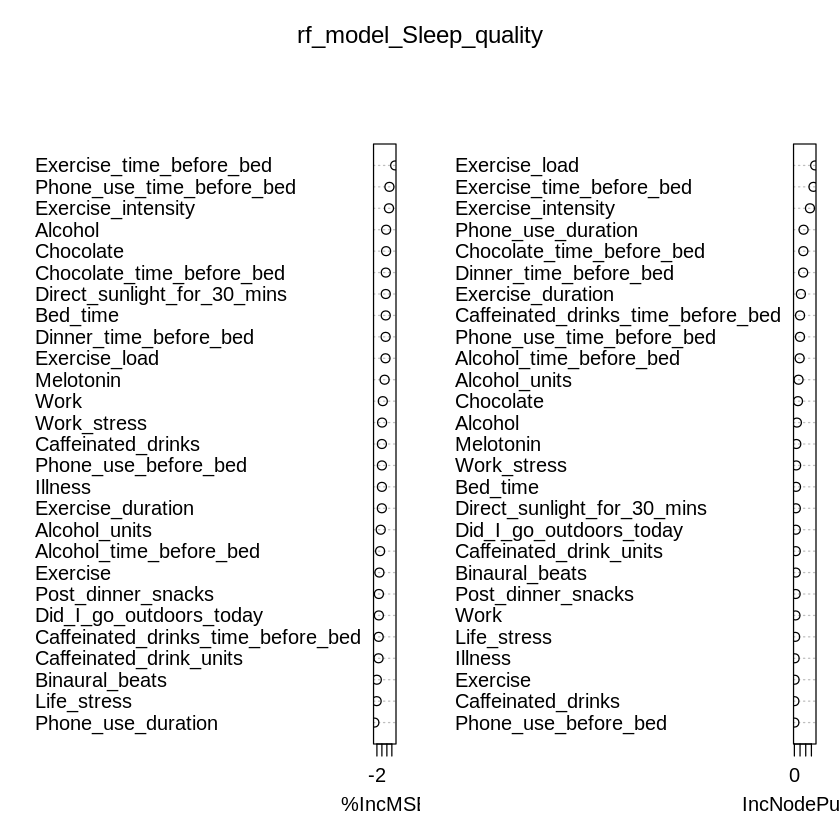

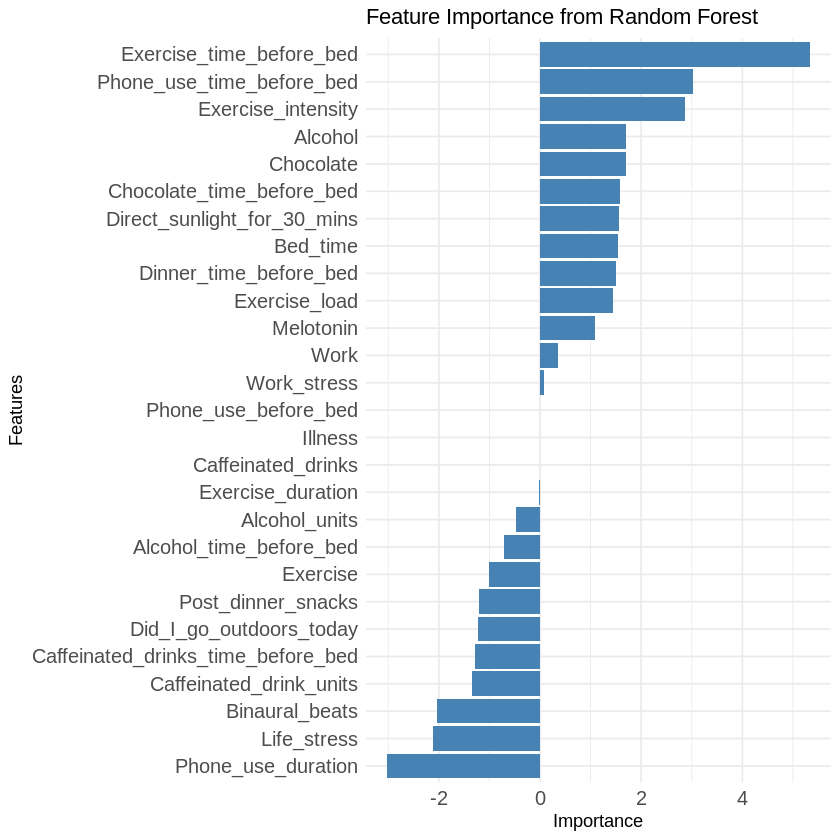

In [143]:
# Split the data into test and training datasets
# Set seed for reproducibility
set.seed(123)

# Check if 'Sleep_quality_percent' column exists in df2_Sleep_quality
if (!"Sleep_quality_percent" %in% colnames(df2_Sleep_quality)) {
  stop("Error: 'Sleep_quality_percent' column not found in df2_Sleep_quality.")
}

# Check the number of unique values in 'sleep_quality_percent'
num_unique <- length(unique(df2_Sleep_quality$Sleep_quality_percent))

# Check if there are enough unique values for partitioning
if (num_unique < 2) {
  stop(paste0("Error: 'Sleep_quality_percent' has only ", num_unique,
              " unique value(s). Need at least 2 for partitioning."))
}

# Proceed with creating the data partition if there are enough unique values
trainIndex_Sleep_quality <- createDataPartition(df2_Sleep_quality$Sleep_quality_percent,
                                                p = 0.8, list = FALSE, times = 1)

trainData_Sleep_quality <- df2_Sleep_quality[trainIndex_Sleep_quality, ]  # Use trainIndex_Sleep_quality
testData_Sleep_quality <- df2_Sleep_quality[-trainIndex_Sleep_quality, ] # Use trainIndex_Sleep_quality

# Check structure of the training data
str(trainData_Sleep_quality)

# Train a Random Forest Model
# with sleep_quality_percent as the dependent variable and all other columns as predictors (~ .)
rf_model_Sleep_quality <- randomForest(Sleep_quality_percent ~ ., data = trainData_Sleep_quality, importance = TRUE)

# View model summary
print(rf_model_Sleep_quality)

# Evaluate model performance
# Predict on test data
predictions_Sleep_quality <- predict(rf_model_Sleep_quality, newdata = testData_Sleep_quality)

# Evaluate performance using R-squared and RMSE
rf_performance_Sleep_quality <- postResample(pred = predictions_Sleep_quality, obs = testData_Sleep_quality$Sleep_quality_percent)
print(rf_performance_Sleep_quality)

# Check variable importance
importance(rf_model_Sleep_quality)
varImpPlot(rf_model_Sleep_quality)

# Extract variable importance as a data frame
var_importance_Sleep_quality <- as.data.frame(importance(rf_model_Sleep_quality))

# Access the 'Importance' column correctly - if it's a matrix, use [, ] indexing
importance_values_Sleep_quality <- var_importance_Sleep_quality[,1]

# Sort the dataframe table in order of variable importance
sorted_var_importance_Sleep_quality <- var_importance_Sleep_quality[order(importance_values_Sleep_quality, decreasing = TRUE), ]

# Use knitr::kable to print a nicer table output
kable(sorted_var_importance_Sleep_quality, caption = "Feature Importance from Random Forest model")

# Convert the importance values into a data frame
var_importance_Sleep_quality2 <- data.frame(Feature = rownames(importance(rf_model_Sleep_quality)),
                             Importance = importance(rf_model_Sleep_quality)[, 1])

# Plot the importance using ggplot2
ggplot(var_importance_Sleep_quality2, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Flip coordinates for better readability
  labs(title = "Feature Importance from Random Forest",
       x = "Features", y = "Importance") +
  theme_minimal() +  # Clean theme
  theme(axis.text.x = element_text(size = 12),  # Customize x-axis text
        axis.text.y = element_text(size = 12))  # Customize y-axis text

NOTE: Some columns (Alcohol_time_before_bed) contain NaN but SHOULD NOT BE REMOVED because when a related colummn (Alcohol) is No, the Alcohol_time_before_bed column is irrelevant and should be ignored. Many machine learning algorithms cannot handle this, but regressor algorithsm like XGBoost and LightGBM can handle NaN and automatically learn the best way to split data when missing values are encountered. These models will internally decide how to handle missing data during training, so there's no need for explicit imputation.

### XGBRegressor (Extreme Gradient Boosting) model with k-fold cross-validation
K-fold cross-validation https://www.statology.org/k-fold-cross-validation-in-r/ helps measure how well the predictions made by the model match the observed data.

In [144]:
# Install and load the xgboost package and library
install.packages("xgboost")
library(xgboost)
# NOTE the caret package, already installed, allows use of RMSE, R2, and MAE functions.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1]	train-rmse:63.881687+0.705340	test-rmse:64.071521+3.911402 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[2]	train-rmse:58.870270+0.893256	test-rmse:59.684793+3.361893 
[3]	train-rmse:54.112106+0.878513	test-rmse:55.496568+2.802571 
[4]	train-rmse:49.939171+1.120045	test-rmse:52.852925+3.320295 
[5]	train-rmse:46.136826+1.336856	test-rmse:49.483122+3.328231 
[6]	train-rmse:42.706040+1.427408	test-rmse:46.952527+3.533396 
[7]	train-rmse:39.704728+1.521556	test-rmse:44.690411+3.578383 
[8]	train-rmse:36.776252+1.308358	test-rmse:41.979469+3.830800 
[9]	train-rmse:34.256504+1.215253	test-rmse:40.415132+4.000391 
[10]	train-rmse:32.000743+1.140071	test-rmse:39.371299+3.601483 
[11]	train-rmse:29.848603+0.789344	test-rmse:37.790234+3.607700 
[12]	train-rmse:27.701061+0.688670	test-rmse:36.529619+3.792475 
[13]	train-rmse:25.798615+0.793905	test-rmse:35.945146+3.778321 
[14]	train-rmse:24.134865+0.7846

Warning message in xgb.train(params, dtrain, nrounds, watchlist, verbose = verbose, :
“xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead.”


[1]	train-rmse:63.680859 
[2]	train-rmse:58.519472 
[3]	train-rmse:53.783300 
[4]	train-rmse:49.967375 
[5]	train-rmse:45.940747 
[6]	train-rmse:43.124994 
[7]	train-rmse:39.941552 
[8]	train-rmse:37.225968 
[9]	train-rmse:34.500139 
[10]	train-rmse:32.189711 
[11]	train-rmse:29.991812 
[12]	train-rmse:28.480343 
[13]	train-rmse:26.380981 
[14]	train-rmse:24.404568 
[15]	train-rmse:22.448058 
[16]	train-rmse:20.837297 
[17]	train-rmse:19.279770 
[18]	train-rmse:18.106298 
[19]	train-rmse:16.699538 
[20]	train-rmse:15.537619 
[21]	train-rmse:14.365537 
[22]	train-rmse:13.374701 
[23]	train-rmse:12.366644 
[24]	train-rmse:11.770278 
[25]	train-rmse:11.222839 
[26]	train-rmse:10.557277 
[27]	train-rmse:9.985311 
[28]	train-rmse:9.390725 
[29]	train-rmse:9.005207 
[30]	train-rmse:8.407348 
[31]	train-rmse:7.957889 
[32]	train-rmse:7.656835 
[33]	train-rmse:7.223757 
[34]	train-rmse:7.068580 
[35]	train-rmse:6.614646 
[36]	train-rmse:6.321107 
[37]	train-rmse:5.916110 
[38]	train-rmse:5.645

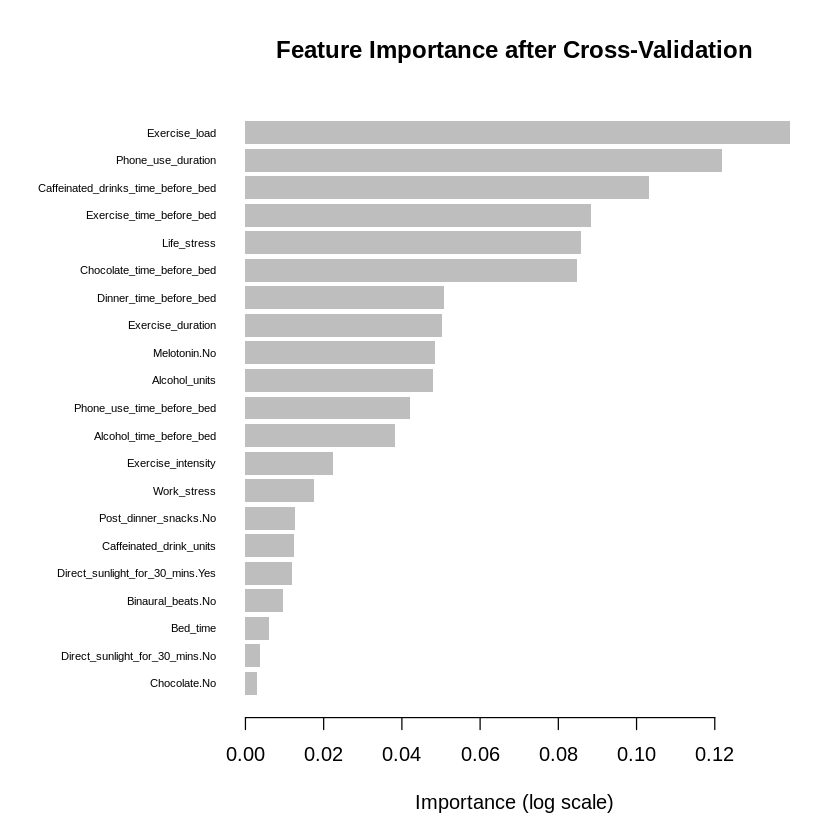

RMSE after CV: 4.15 
R-squared after CV: 0.987 
MAE after CV: 2.78 


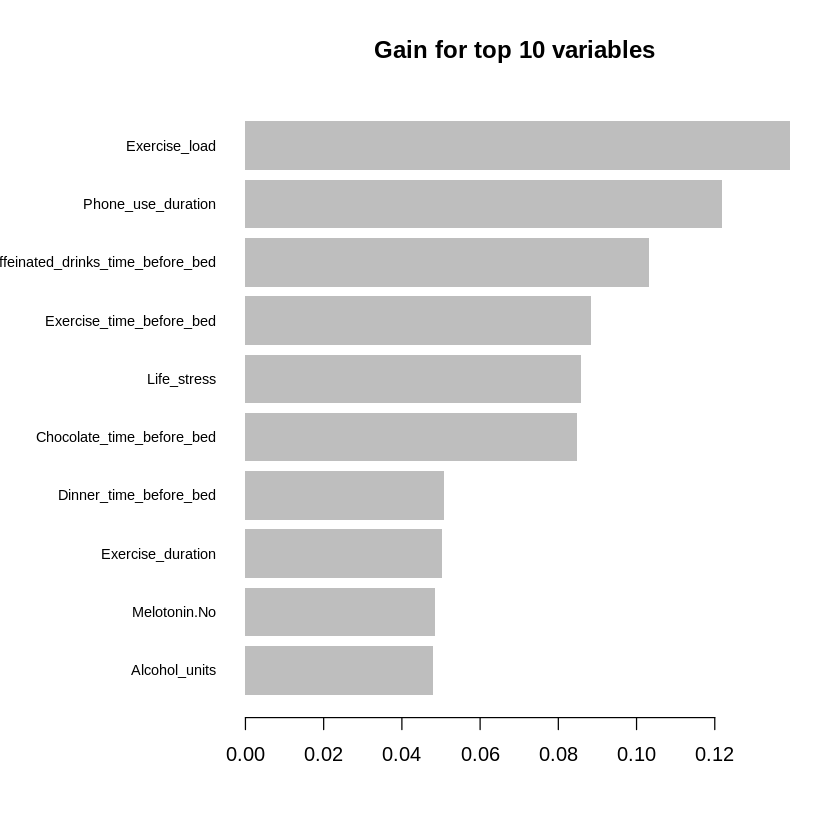

In [145]:
# Prepare the data
y_Sleep_quality <- df2_Sleep_quality$Sleep_quality_percent
# Exclude the dependent variable from the independent variables
X_Sleep_quality <- df2_Sleep_quality[, !(names(df2_Sleep_quality) %in% c("Sleep_quality_percent"))]

# Identify categorical features and perform one-hot encoding using dummyVars from caret
categorical_features <- names(X_Sleep_quality)[sapply(X_Sleep_quality, is.factor) | sapply(X_Sleep_quality, is.character)]
dummies <- dummyVars(" ~ .", data = X_Sleep_quality[, categorical_features])
X_Sleep_quality_encoded <- predict(dummies, newdata = X_Sleep_quality)

# Combine encoded categorical features with numeric features
X_Sleep_quality_final <- cbind(X_Sleep_quality[, !names(X_Sleep_quality) %in% categorical_features], X_Sleep_quality_encoded)
X_Sleep_quality_final <- as.matrix(X_Sleep_quality_final)

# Define parameters for XGBoost
params_Sleep_quality <- list(
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 6,
  subsample = 0.8,
  colsample_bytree = 0.8,
  seed = 123
)

# Cross-validation
cv_results_Sleep_quality <- xgb.cv(
  params = params_Sleep_quality,
  data = X_Sleep_quality_final,
  label = y_Sleep_quality,
  nfold = 5,               # 5-fold cross-validation
  nrounds = 100,           # Number of boosting rounds
  metrics = "rmse",        # Metric to evaluate
  verbose = TRUE,          # Print CV progress
  early_stopping_rounds = 10,  # Stop if no improvement after 10 rounds
  maximize = FALSE         # Minimize RMSE
)

# Train the model using the optimal number of rounds from CV
best_nrounds_Sleep_quality <- cv_results_Sleep_quality$best_iteration

xgb_model_cv_Sleep_quality <- xgboost(
  params = params_Sleep_quality,
  data = X_Sleep_quality_final,
  label = y_Sleep_quality,
  nrounds = best_nrounds_Sleep_quality,
  verbose = 1
)

# Feature importance
importance_matrix_cv_Sleep_quality <- xgb.importance(feature_names = colnames(X_Sleep_quality_final), model = xgb_model_cv_Sleep_quality)

# View feature importance metrics
print(importance_matrix_cv_Sleep_quality)

# Plot the feature importance
xgb.plot.importance(importance_matrix_cv_Sleep_quality,
    main = "Feature Importance after Cross-Validation",
    col = "grey",
    xlab = "Importance (log scale)"
)

# Visualise gain for top 10 variables
xgb.plot.importance(importance_matrix_cv_Sleep_quality,
                    main = "Gain for top 10 variables",
                    col = "grey",  # Change bar color
                     top_n = 10,        # Display top 10 features
                     measure = "Gain")  # You can use "Gain", "Cover", "Frequency" or "Importance"

# Optional: Evaluate using the full dataset (you can also split into test/train to avoid data leakage)
predictions_xgb_cv_Sleep_quality <- predict(xgb_model_cv_Sleep_quality, newdata = X_Sleep_quality_final)

# Calculate performance metrics
rmse_xgb_cv_Sleep_quality <- RMSE(predictions_xgb_cv_Sleep_quality, y_Sleep_quality)
r2_xgb_cv_Sleep_quality <- R2(predictions_xgb_cv_Sleep_quality, y_Sleep_quality)
mae_xgb_cv_Sleep_quality <- MAE(predictions_xgb_cv_Sleep_quality, y_Sleep_quality)

# Print results
cat("RMSE after CV:", signif(rmse_xgb_cv_Sleep_quality, 3), "\n")
cat("R-squared after CV:", signif(r2_xgb_cv_Sleep_quality, 3), "\n")
cat("MAE after CV:", signif(mae_xgb_cv_Sleep_quality, 3), "\n")

## Sleep duration

### Random forest model

In [146]:
# Preprocess the data
# Remove specific columns using dplyr's select()
df2_Total_sleep_time <- df2 %>%
  select(-Sleep_quality_percent, -Sleep_onset_latency_log, -Wakefullness_percent)

# Verify the new dataframe
str(df2_Total_sleep_time)

'data.frame':	28 obs. of  28 variables:
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 2.75 3 ...
 $ Post_dinner_snacks                : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 2 1 1 ...
 $ Alcohol                           : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 1 1 1 1 1 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 0 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 0 0 0 0 0 0 ...
 $ Caffeinated_drinks                : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 14 13.5 ...
 $ Chocolate                         : Factor w/ 2 levels "No","Yes": 2 2 1 1 1 2 1 2 2 2 ...
 $ Chocolate_time_before_bed         : num  2 6 0 0 0 11 0 1.5 6 9.5 ...
 $ Phone_use_before_bed              : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Phone_use_duration                : int  5 15 5 5

In [147]:
# Split into test and train datasets
# Set seed for reproducibility
set.seed(123)

# Check if 'Total_sleep_time' column exists in df2_Total_sleep_time
if (!"Total_sleep_time" %in% colnames(df2_Total_sleep_time)) {
  stop("Error: 'Total_sleep_time' column not found in df2_Total_sleep_time.")
}

# Check the number of unique values in 'Total_sleep_time'
num_unique <- length(unique(df2_Total_sleep_time$Total_sleep_time))

# Check if there are enough unique values for partitioning
if (num_unique < 2) {
  stop(paste0("Error: 'Total_sleep_time' has only ", num_unique,
              " unique value(s). Need at least 2 for partitioning."))
}

# Proceed with creating the data partition if there are enough unique values
trainIndex_Total_sleep_time <- createDataPartition(df2_Total_sleep_time$Total_sleep_time,
                                                p = 0.8, list = FALSE, times = 1)

trainData_Total_sleep_time <- df2_Total_sleep_time[trainIndex_Total_sleep_time, ]  # Use trainIndex_Total_sleep_time
testData_Total_sleep_time <- df2_Total_sleep_time[-trainIndex_Total_sleep_time, ] # Use trainIndex_Total_sleep_time

# Check structure of the training data
str(trainData_Total_sleep_time)

'data.frame':	24 obs. of  28 variables:
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 3 3.5 ...
 $ Post_dinner_snacks                : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 2 1 2 ...
 $ Alcohol                           : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 1 1 1 1 2 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 2 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 0 0 0 0 0 2 ...
 $ Caffeinated_drinks                : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 13.5 12.5 ...
 $ Chocolate                         : Factor w/ 2 levels "No","Yes": 2 2 1 1 1 2 1 2 2 2 ...
 $ Chocolate_time_before_bed         : num  2 6 0 0 0 11 0 1.5 9.5 2 ...
 $ Phone_use_before_bed              : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Phone_use_duration                : int  5 15 5 


Call:
 randomForest(formula = Total_sleep_time ~ ., data = trainData_Total_sleep_time,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 0.4948496
                    % Var explained: -19.04
     RMSE  Rsquared       MAE 
0.5174087 0.9310812 0.4477896 


,%IncMSE,IncNodePurity
Dinner_time_before_bed,-2.1252396855,0.584539566
Post_dinner_snacks,-0.4641505347,0.144498528
Alcohol,2.6297486215,0.224403450
Alcohol_units,0.1618989751,0.323646401
Alcohol_time_before_bed,0.6318727445,0.535084856
Caffeinated_drinks,0.0000000000,0.000000000
Caffeinated_drink_units,-0.9532561769,0.180822563
Caffeinated_drinks_time_before_bed,0.4052277883,0.511823121
Chocolate,-0.2730796653,0.059749796
Chocolate_time_before_bed,-1.2700926720,0.360659499


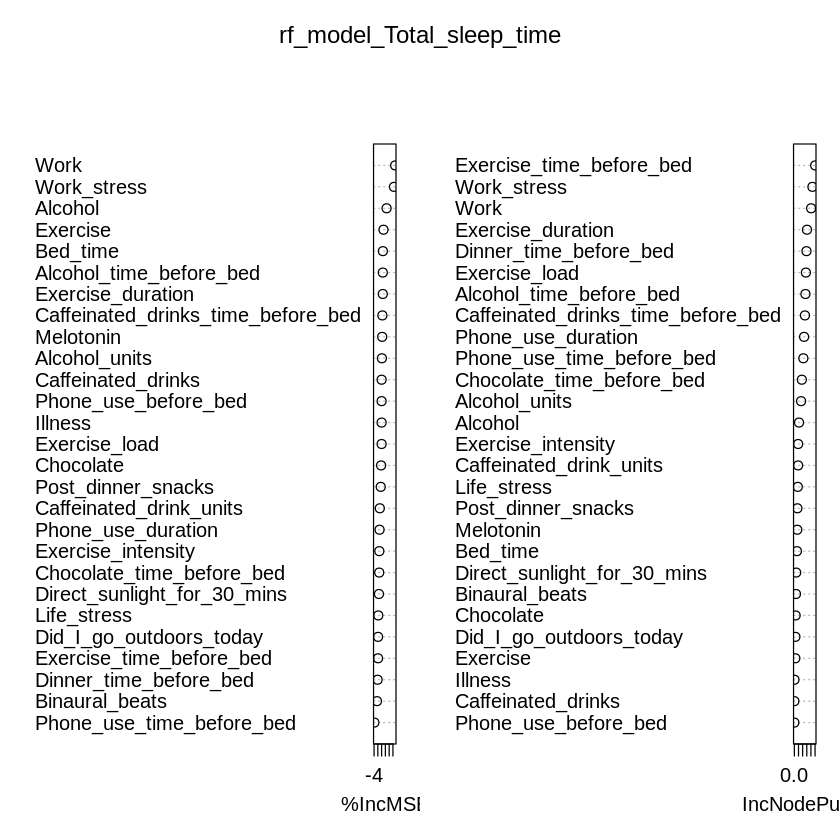

In [148]:
# Build Random Forest Model with Total_sleep_time_percent as the dependent variable and all other columns as predictors (~ .)
rf_model_Total_sleep_time <- randomForest(Total_sleep_time ~ ., data = trainData_Total_sleep_time, importance = TRUE)

# View model summary
print(rf_model_Total_sleep_time)

# Predict on test data
predictions_Total_sleep_time <- predict(rf_model_Total_sleep_time, newdata = testData_Total_sleep_time)

# Evaluate performance using R-squared and RMSE
rf_performance_Total_sleep_time <- postResample(pred = predictions_Total_sleep_time, obs = testData_Total_sleep_time$Total_sleep_time)
print(rf_performance_Total_sleep_time)

# Check variable importance
importance(rf_model_Total_sleep_time)
varImpPlot(rf_model_Total_sleep_time)

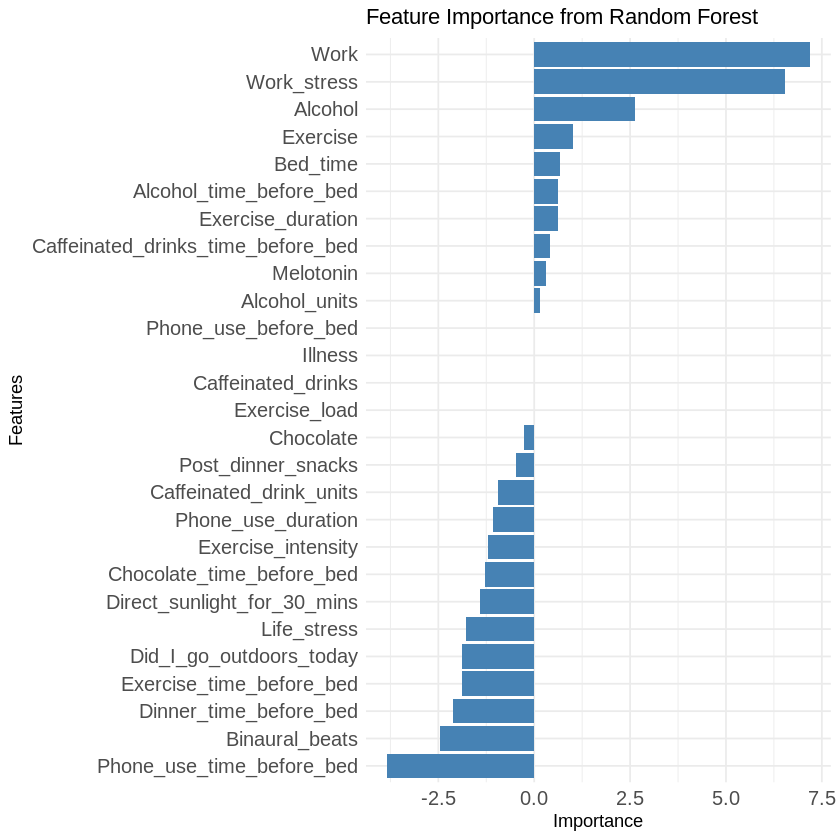

In [149]:
# Convert the importance values into a data frame
var_importance_Total_sleep_time2 <- data.frame(Feature = rownames(importance(rf_model_Total_sleep_time)),
                             Importance = importance(rf_model_Total_sleep_time)[, 1])

# Plot the importance using ggplot2
ggplot(var_importance_Total_sleep_time2, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Flip coordinates for better readability
  labs(title = "Feature Importance from Random Forest",
       x = "Features", y = "Importance") +
  theme_minimal() +  # Clean theme
  theme(axis.text.x = element_text(size = 12),  # Customize x-axis text
        axis.text.y = element_text(size = 12))  # Customize y-axis text

NOTE: Some columns (Alcohol_time_before_bed) contain NaN but SHOULD NOT BE REMOVED because when a related colummn (Alcohol) is No, the Alcohol_time_before_bed column is irrelevant and should be ignored. Many machine learning algorithms cannot handle this, but regressor algorithsm like XGBoost and LightGBM can handle NaN and automatically learn the best way to split data when missing values are encountered. These models will internally decide how to handle missing data during training, so there's no need for explicit imputation.

### XGBRegressor (Extreme Gradient Boosting) model with k-fold cross-validation
K-fold cross-validation https://www.statology.org/k-fold-cross-validation-in-r/ helps measure how well the predictions made by the model match the observed data.

[1]	train-rmse:6.026252+0.049599	test-rmse:6.015901+0.261616 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[2]	train-rmse:5.460754+0.049565	test-rmse:5.449764+0.261879 
[3]	train-rmse:4.951433+0.045748	test-rmse:4.939778+0.265606 
[4]	train-rmse:4.489825+0.040349	test-rmse:4.477343+0.271334 
[5]	train-rmse:4.083159+0.025480	test-rmse:4.069936+0.286657 
[6]	train-rmse:3.707790+0.027451	test-rmse:3.693674+0.283617 
[7]	train-rmse:3.374930+0.025410	test-rmse:3.359849+0.283690 
[8]	train-rmse:3.066547+0.020756	test-rmse:3.050436+0.287782 
[9]	train-rmse:2.785742+0.019700	test-rmse:2.768412+0.288569 
[10]	train-rmse:2.536880+0.018322	test-rmse:2.518415+0.291534 
[11]	train-rmse:2.313135+0.020374	test-rmse:2.293263+0.288472 
[12]	train-rmse:2.111614+0.021627	test-rmse:2.090474+0.289826 
[13]	train-rmse:1.932922+0.032878	test-rmse:1.915862+0.289699 
[14]	train-rmse:1.766238+0.035192	test-rmse:1.753572+0.291

Warning message in xgb.train(params, dtrain, nrounds, watchlist, verbose = verbose, :
“xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead.”


[1]	train-rmse:6.016402 
[2]	train-rmse:5.442130 
[3]	train-rmse:4.935374 
[4]	train-rmse:4.481204 
[5]	train-rmse:4.060014 
[6]	train-rmse:3.680104 
[7]	train-rmse:3.342248 
[8]	train-rmse:3.029902 
[9]	train-rmse:2.756507 
[10]	train-rmse:2.504627 
[11]	train-rmse:2.282263 
[12]	train-rmse:2.075484 
[13]	train-rmse:1.889875 
[14]	train-rmse:1.726994 
[15]	train-rmse:1.580339 
[16]	train-rmse:1.464700 
[17]	train-rmse:1.344924 
[18]	train-rmse:1.241179 
[19]	train-rmse:1.143136 
[20]	train-rmse:1.056476 
[21]	train-rmse:0.970084 
[22]	train-rmse:0.902446 
[23]	train-rmse:0.842638 
[24]	train-rmse:0.783660 
[25]	train-rmse:0.739084 
[26]	train-rmse:0.694342 
[27]	train-rmse:0.639936 
[28]	train-rmse:0.594503 
[29]	train-rmse:0.552113 
[30]	train-rmse:0.530961 
[31]	train-rmse:0.496350 
[32]	train-rmse:0.470546 
[33]	train-rmse:0.453298 
[34]	train-rmse:0.432494 
[35]	train-rmse:0.406227 
[36]	train-rmse:0.388668 
[37]	train-rmse:0.364107 
[38]	train-rmse:0.349080 
[39]	train-rmse:0.336

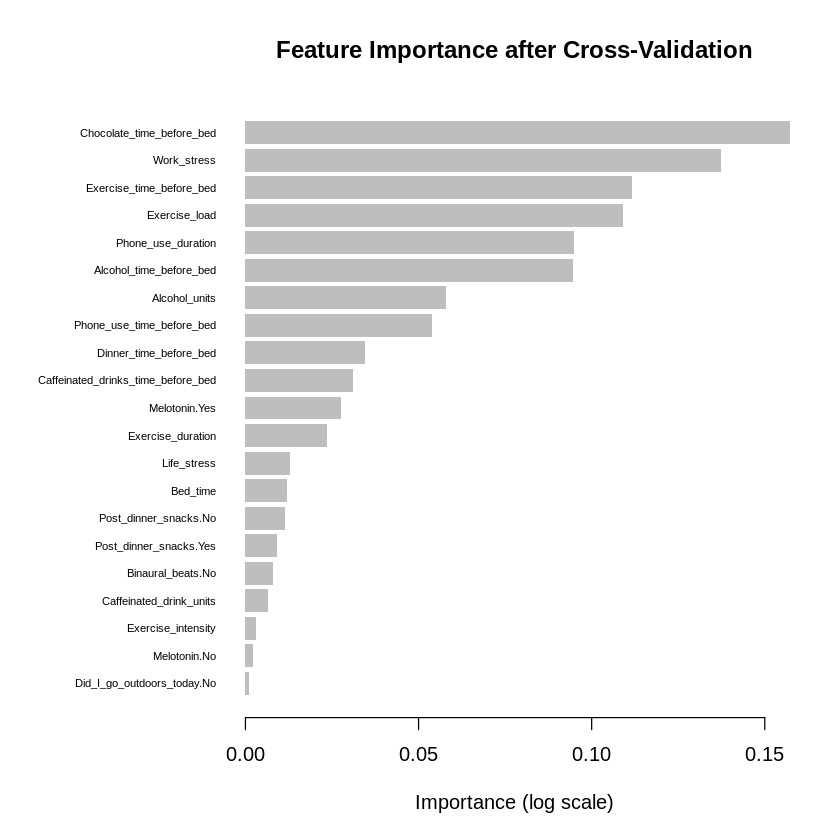

RMSE after CV: 0.292 
R-squared after CV: 0.929 
MAE after CV: 0.193 


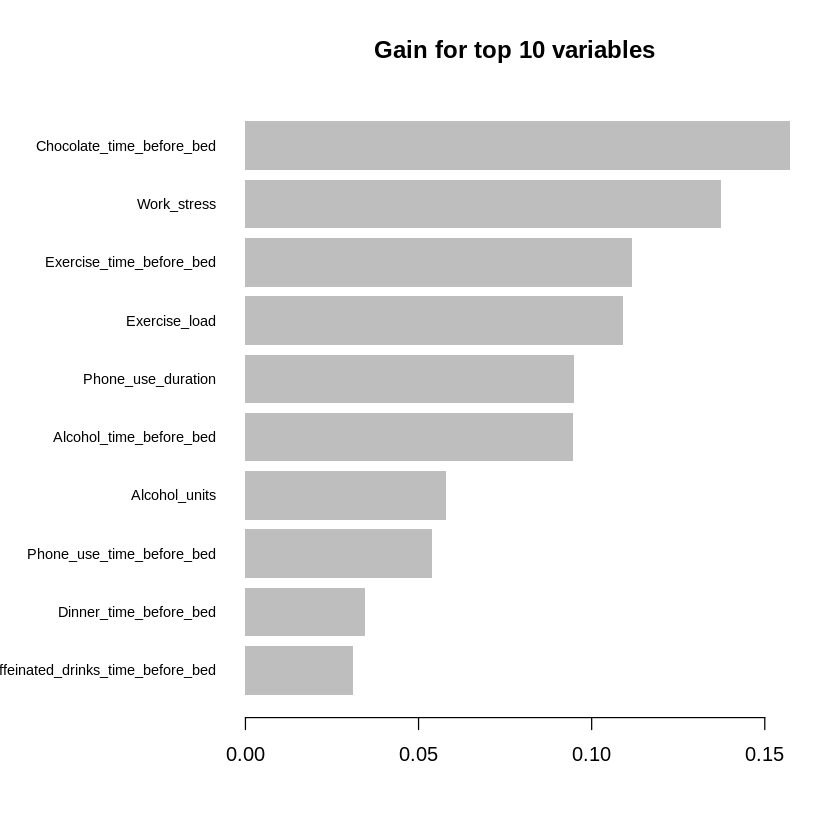

In [150]:
# Prepare the data
y_Total_sleep_time <- df2_Total_sleep_time$Total_sleep_time
# Exclude the dependent variable from the independent variables
X_Total_sleep_time <- df2_Total_sleep_time[, !(names(df2_Total_sleep_time) %in% c("Total_sleep_time"))]

# Identify categorical features and perform one-hot encoding using dummyVars from caret
categorical_features <- names(X_Total_sleep_time)[sapply(X_Total_sleep_time, is.factor) | sapply(X_Total_sleep_time, is.character)]
dummies <- dummyVars(" ~ .", data = X_Total_sleep_time[, categorical_features])
X_Total_sleep_time_encoded <- predict(dummies, newdata = X_Total_sleep_time)

# Combine encoded categorical features with numeric features
X_Total_sleep_time_final <- cbind(X_Total_sleep_time[, !names(X_Total_sleep_time) %in% categorical_features], X_Total_sleep_time_encoded)
X_Total_sleep_time_final <- as.matrix(X_Total_sleep_time_final)

# Define parameters for XGBoost
params_Total_sleep_time <- list(
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 6,
  subsample = 0.8,
  colsample_bytree = 0.8,
  seed = 123
)

# Cross-validation
cv_results_Total_sleep_time <- xgb.cv(
  params = params_Total_sleep_time,
  data = X_Total_sleep_time_final,
  label = y_Total_sleep_time,
  nfold = 5,               # 5-fold cross-validation
  nrounds = 100,           # Number of boosting rounds
  metrics = "rmse",        # Metric to evaluate
  verbose = TRUE,          # Print CV progress
  early_stopping_rounds = 10,  # Stop if no improvement after 10 rounds
  maximize = FALSE         # Minimize RMSE
)

# Train the model using the optimal number of rounds from CV
best_nrounds_Total_sleep_time <- cv_results_Total_sleep_time$best_iteration

xgb_model_cv_Total_sleep_time <- xgboost(
  params = params_Total_sleep_time,
  data = X_Total_sleep_time_final,
  label = y_Total_sleep_time,
  nrounds = best_nrounds_Total_sleep_time,
  verbose = 1
)

# Feature importance
importance_matrix_cv_Total_sleep_time <- xgb.importance(feature_names = colnames(X_Total_sleep_time_final), model = xgb_model_cv_Total_sleep_time)

# View feature importance metrics
print(importance_matrix_cv_Total_sleep_time)

# Plot the feature importance
xgb.plot.importance(importance_matrix_cv_Total_sleep_time,
    main = "Feature Importance after Cross-Validation",
    col = "grey",
    xlab = "Importance (log scale)"
)

# Visualise gain for top 10 variables
xgb.plot.importance(importance_matrix_cv_Total_sleep_time,
                    main = "Gain for top 10 variables",
                    col = "grey",  # Change bar color
                     top_n = 10,        # Display top 10 features
                     measure = "Gain")  # You can use "Gain", "Cover", "Frequency" or "Importance"

# Optional: Evaluate using the full dataset (you can also split into test/train to avoid data leakage)
predictions_xgb_cv_Total_sleep_time <- predict(xgb_model_cv_Total_sleep_time, newdata = X_Total_sleep_time_final)

# Calculate performance metrics
rmse_xgb_cv_Total_sleep_time <- RMSE(predictions_xgb_cv_Total_sleep_time, y_Total_sleep_time)
r2_xgb_cv_Total_sleep_time <- R2(predictions_xgb_cv_Total_sleep_time, y_Total_sleep_time)
mae_xgb_cv_Total_sleep_time <- MAE(predictions_xgb_cv_Total_sleep_time, y_Total_sleep_time)

# Print results
cat("RMSE after CV:", signif(rmse_xgb_cv_Total_sleep_time, 3), "\n")
cat("R-squared after CV:", signif(r2_xgb_cv_Total_sleep_time, 3), "\n")
cat("MAE after CV:", signif(mae_xgb_cv_Total_sleep_time, 3), "\n")

## Sleep onset latency

### Random forest model

In [151]:
# Preprocess the data
# Remove specific columns using dplyr's select()
df2_Sleep_onset_latency_log <- df2 %>%
  select(-Sleep_quality_percent, -Total_sleep_time, -Wakefullness_percent)

# Verify the new dataframe
str(df2_Sleep_onset_latency_log)

'data.frame':	28 obs. of  28 variables:
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 2.75 3 ...
 $ Post_dinner_snacks                : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 2 1 1 ...
 $ Alcohol                           : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 1 1 1 1 1 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 0 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 0 0 0 0 0 0 ...
 $ Caffeinated_drinks                : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 14 13.5 ...
 $ Chocolate                         : Factor w/ 2 levels "No","Yes": 2 2 1 1 1 2 1 2 2 2 ...
 $ Chocolate_time_before_bed         : num  2 6 0 0 0 11 0 1.5 6 9.5 ...
 $ Phone_use_before_bed              : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Phone_use_duration                : int  5 15 5 5

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = Sleep_onset_latency_log ~ ., data = trainData_Sleep_onset_latency_log,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 0.2859862
                    % Var explained: -9.63
     RMSE  Rsquared       MAE 
0.6729187 0.5640499 0.6620900 


,%IncMSE,IncNodePurity
Dinner_time_before_bed,-1.58979419,0.09592857
Post_dinner_snacks,-0.97974840,0.08841514
Alcohol,0.71601436,0.05923441
Alcohol_units,0.10104400,0.15586395
Alcohol_time_before_bed,-0.73323349,0.14656289
Caffeinated_drinks,0.00000000,0.00000000
Caffeinated_drink_units,-0.52410982,0.03362936
Caffeinated_drinks_time_before_bed,-0.66621155,0.19676886
Chocolate,-1.24491564,0.03935377
Chocolate_time_before_bed,-2.05083961,0.20536288


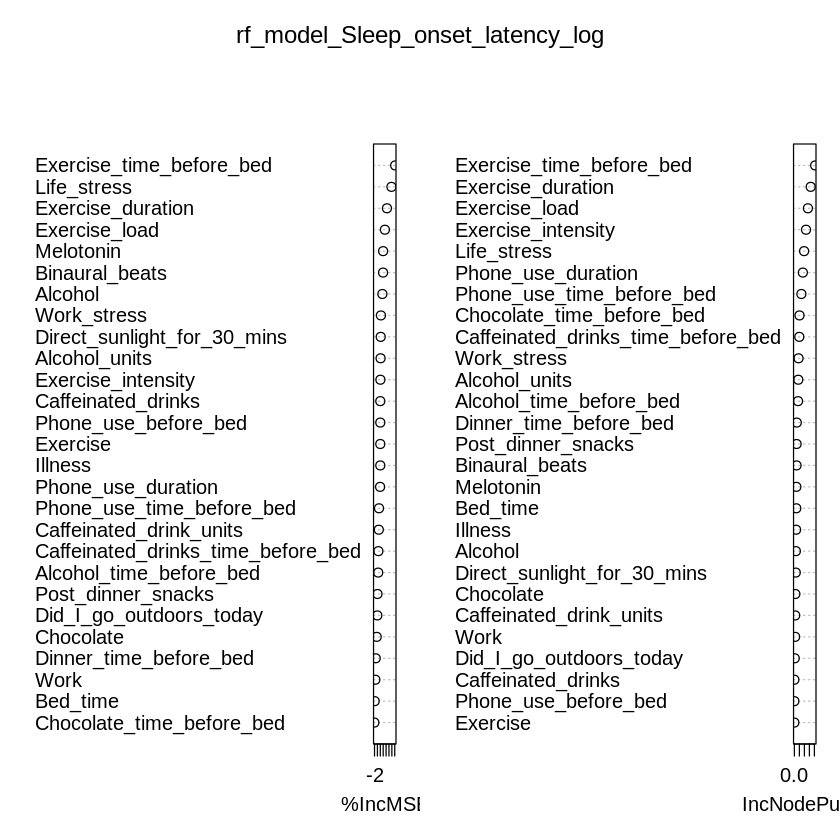

In [152]:
# Split into test and train datasets
# Set seed for reproducibility
set.seed(123)

# Check if 'Sleep_onset_latency_log' column exists in df2_Sleep_onset_latency_log
if (!"Sleep_onset_latency_log" %in% colnames(df2_Sleep_onset_latency_log)) {
  stop("Error: 'Sleep_onset_latency_log' column not found in df2_Sleep_onset_latency_log.")
}

# Check the number of unique values in 'Sleep_onset_latency_log'
num_unique <- length(unique(df2_Sleep_onset_latency_log$Sleep_onset_latency_log))

# Check if there are enough unique values for partitioning
if (num_unique < 2) {
  stop(paste0("Error: 'Sleep_onset_latency_log' has only ", num_unique,
              " unique value(s). Need at least 2 for partitioning."))
}

# Proceed with creating the data partition if there are enough unique values
trainIndex_Sleep_onset_latency_log <- createDataPartition(df2_Sleep_onset_latency_log$Sleep_onset_latency_log,
                                                p = 0.8, list = FALSE, times = 1)

trainData_Sleep_onset_latency_log <- df2_Sleep_onset_latency_log[trainIndex_Sleep_onset_latency_log, ]  # Use trainIndex_Sleep_onset_latency_log
testData_Sleep_onset_latency_log <- df2_Sleep_onset_latency_log[-trainIndex_Sleep_onset_latency_log, ] # Use trainIndex_Sleep_onset_latency_log

# Build Random Forest Model with Sleep_onset_latency_log_percent as the dependent variable and all other columns as predictors (~ .)
rf_model_Sleep_onset_latency_log <- randomForest(Sleep_onset_latency_log ~ ., data = trainData_Sleep_onset_latency_log, importance = TRUE)

# View model summary
print(rf_model_Sleep_onset_latency_log)

# Predict on test data
predictions_Sleep_onset_latency_log <- predict(rf_model_Sleep_onset_latency_log, newdata = testData_Sleep_onset_latency_log)

# Evaluate performance using R-squared and RMSE
rf_performance_Sleep_onset_latency_log <- postResample(pred = predictions_Sleep_onset_latency_log, obs = testData_Sleep_onset_latency_log$Sleep_onset_latency_log)
print(rf_performance_Sleep_onset_latency_log)

# Check variable importance
importance(rf_model_Sleep_onset_latency_log)
varImpPlot(rf_model_Sleep_onset_latency_log)

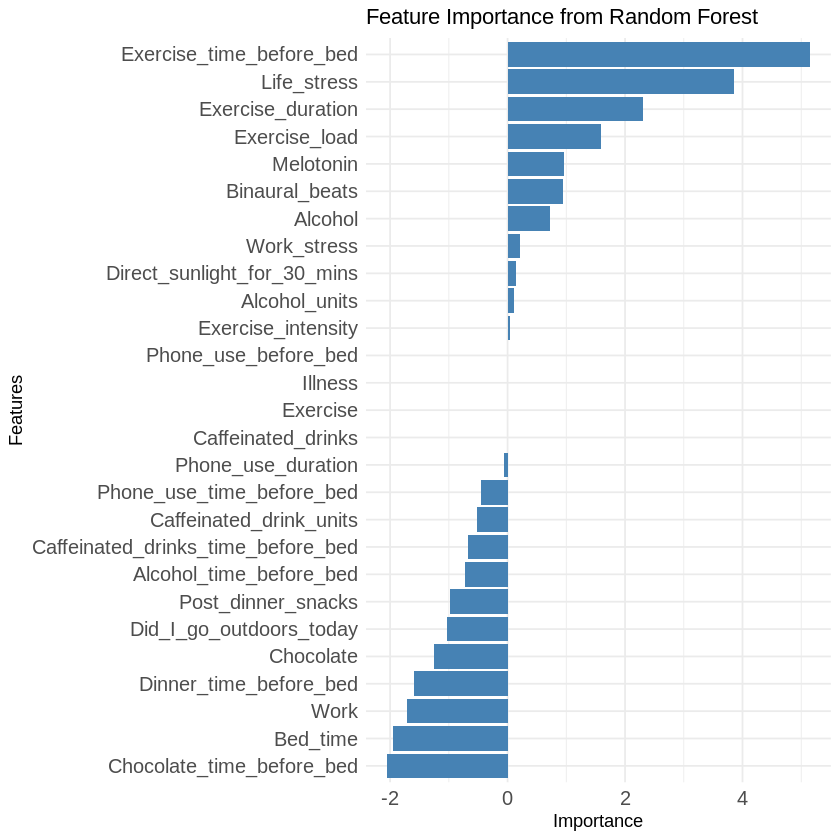

In [153]:
# Convert the importance values into a data frame
var_importance_Sleep_onset_latency_log2 <- data.frame(Feature = rownames(importance(rf_model_Sleep_onset_latency_log)),
                             Importance = importance(rf_model_Sleep_onset_latency_log)[, 1])

# Plot the importance using ggplot2
ggplot(var_importance_Sleep_onset_latency_log2, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Flip coordinates for better readability
  labs(title = "Feature Importance from Random Forest",
       x = "Features", y = "Importance") +
  theme_minimal() +  # Clean theme
  theme(axis.text.x = element_text(size = 12),  # Customize x-axis text
        axis.text.y = element_text(size = 12))  # Customize y-axis text

NOTE: Some columns (Alcohol_time_before_bed) contain NaN but SHOULD NOT BE REMOVED because when a related colummn (Alcohol) is No, the Alcohol_time_before_bed column is irrelevant and should be ignored. Many machine learning algorithms cannot handle this, but regressor algorithsm like XGBoost and LightGBM can handle NaN and automatically learn the best way to split data when missing values are encountered. These models will internally decide how to handle missing data during training, so there's no need for explicit imputation.

### XGBRegressor (Extreme Gradient Boosting) model with k-fold cross-validation
K-fold cross-validation https://www.statology.org/k-fold-cross-validation-in-r/ helps measure how well the predictions made by the model match the observed data.

[1]	train-rmse:2.392876+0.028772	test-rmse:2.380916+0.126867 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[2]	train-rmse:2.177605+0.025072	test-rmse:2.165199+0.132097 
[3]	train-rmse:1.984966+0.025121	test-rmse:1.972063+0.133822 
[4]	train-rmse:1.808986+0.027558	test-rmse:1.795557+0.133540 
[5]	train-rmse:1.656553+0.024592	test-rmse:1.642566+0.139085 
[6]	train-rmse:1.514220+0.018113	test-rmse:1.499605+0.145475 
[7]	train-rmse:1.384878+0.016866	test-rmse:1.369584+0.147318 
[8]	train-rmse:1.268361+0.013427	test-rmse:1.252347+0.151939 
[9]	train-rmse:1.164772+0.011102	test-rmse:1.157498+0.158747 
[10]	train-rmse:1.069601+0.012492	test-rmse:1.067203+0.144779 
[11]	train-rmse:0.989330+0.013260	test-rmse:0.996333+0.142572 
[12]	train-rmse:0.915657+0.008951	test-rmse:0.943063+0.141627 
[13]	train-rmse:0.852695+0.014380	test-rmse:0.896961+0.131205 
[14]	train-rmse:0.792083+0.015151	test-rmse:0.858205+0.126

Warning message in xgb.train(params, dtrain, nrounds, watchlist, verbose = verbose, :
“xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead.”


[1]	train-rmse:2.390462 
[2]	train-rmse:2.168547 
[3]	train-rmse:1.972154 
[4]	train-rmse:1.798536 
[5]	train-rmse:1.650611 
[6]	train-rmse:1.498392 
[7]	train-rmse:1.369828 
[8]	train-rmse:1.254265 
[9]	train-rmse:1.155903 
[10]	train-rmse:1.064734 
[11]	train-rmse:0.993658 
[12]	train-rmse:0.920303 
[13]	train-rmse:0.855167 
[14]	train-rmse:0.787581 
[15]	train-rmse:0.726971 
[16]	train-rmse:0.675876 
[17]	train-rmse:0.638219 
[18]	train-rmse:0.599155 
[19]	train-rmse:0.555167 
[20]	train-rmse:0.527167 
[21]	train-rmse:0.485393 
[22]	train-rmse:0.452531 
[23]	train-rmse:0.422044 
[24]	train-rmse:0.391527 
[25]	train-rmse:0.366342 
[26]	train-rmse:0.337089 
[27]	train-rmse:0.313764 
[28]	train-rmse:0.295292 
[29]	train-rmse:0.273195 
[30]	train-rmse:0.254580 
[31]	train-rmse:0.240980 
[32]	train-rmse:0.231569 
[33]	train-rmse:0.216598 
[34]	train-rmse:0.201285 
[35]	train-rmse:0.186105 
[36]	train-rmse:0.177051 
[37]	train-rmse:0.164679 
[38]	train-rmse:0.156481 
[39]	train-rmse:0.147

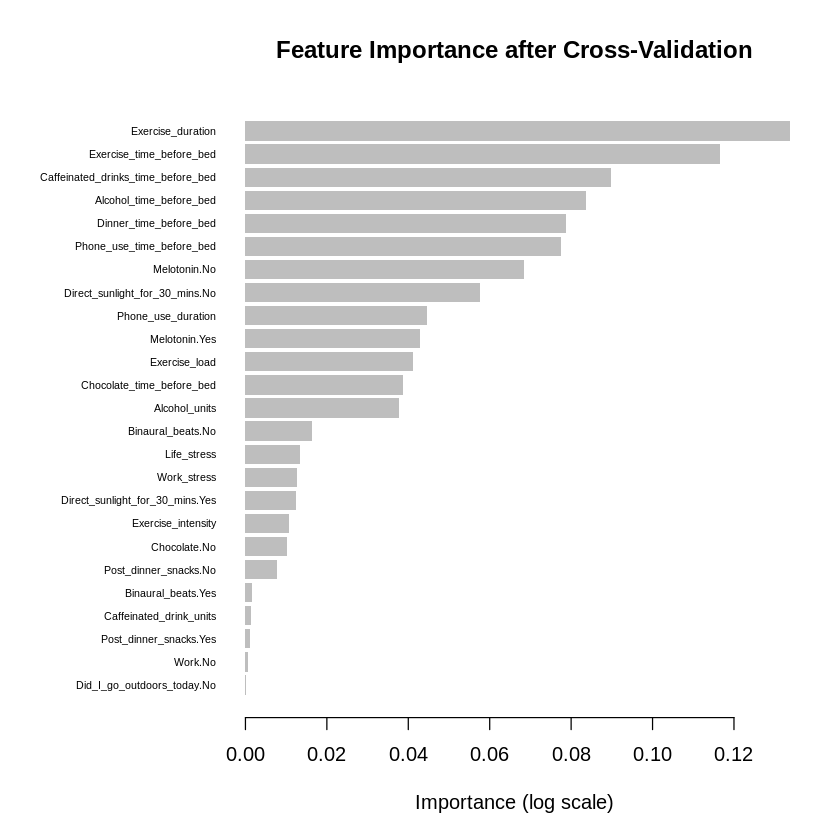

RMSE after CV: 0.0799 
R-squared after CV: 0.992 
MAE after CV: 0.0529 


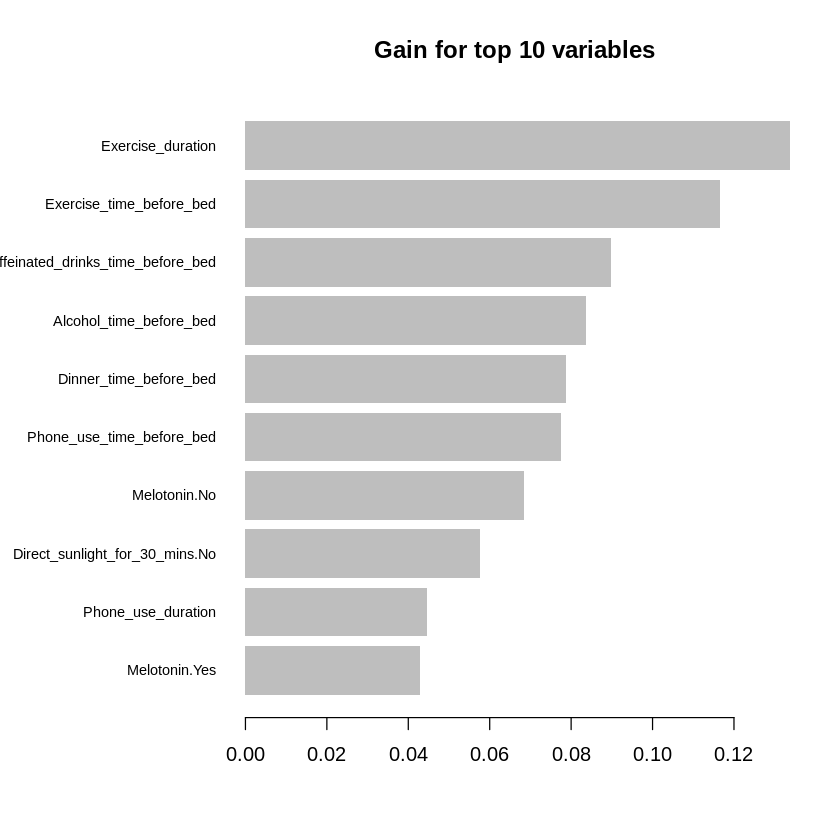

In [154]:
# Prepare the data
y_Sleep_onset_latency_log <- df2_Sleep_onset_latency_log$Sleep_onset_latency_log
# Exclude the dependent variable from the independent variables
X_Sleep_onset_latency_log <- df2_Sleep_onset_latency_log[, !(names(df2_Sleep_onset_latency_log) %in% c("Sleep_onset_latency_log"))]

# Identify categorical features and perform one-hot encoding using dummyVars from caret
categorical_features <- names(X_Sleep_onset_latency_log)[sapply(X_Sleep_onset_latency_log, is.factor) | sapply(X_Sleep_onset_latency_log, is.character)]
dummies <- dummyVars(" ~ .", data = X_Sleep_onset_latency_log[, categorical_features])
X_Sleep_onset_latency_log_encoded <- predict(dummies, newdata = X_Sleep_onset_latency_log)

# Combine encoded categorical features with numeric features
X_Sleep_onset_latency_log_final <- cbind(X_Sleep_onset_latency_log[, !names(X_Sleep_onset_latency_log) %in% categorical_features], X_Sleep_onset_latency_log_encoded)
X_Sleep_onset_latency_log_final <- as.matrix(X_Sleep_onset_latency_log_final)

# Define parameters for XGBoost
params_Sleep_onset_latency <- list(
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 6,
  subsample = 0.8,
  colsample_bytree = 0.8,
  seed = 123
)

# Cross-validation
cv_results_Sleep_onset_latency <- xgb.cv(
  params = params_Sleep_onset_latency,
  data = X_Sleep_onset_latency_log_final,
  label = y_Sleep_onset_latency_log,
  nfold = 5,               # 5-fold cross-validation
  nrounds = 100,           # Number of boosting rounds
  metrics = "rmse",        # Metric to evaluate
  verbose = TRUE,          # Print CV progress
  early_stopping_rounds = 10,  # Stop if no improvement after 10 rounds
  maximize = FALSE         # Minimize RMSE
)

# Train the model using the optimal number of rounds from CV
best_nrounds_Sleep_onset_latency <- cv_results_Sleep_onset_latency$best_iteration

xgb_model_cv_Sleep_onset_latency <- xgboost(
  params = params_Sleep_onset_latency,
  data = X_Sleep_onset_latency_log_final,
  label = y_Sleep_onset_latency_log,
  nrounds = best_nrounds_Sleep_onset_latency,
  verbose = 1
)

# Feature importance
importance_matrix_cv_Sleep_onset_latency <- xgb.importance(feature_names = colnames(X_Sleep_onset_latency_log_final), model = xgb_model_cv_Sleep_onset_latency)

# View feature importance metrics
print(importance_matrix_cv_Sleep_onset_latency)

# Plot the feature importance
xgb.plot.importance(importance_matrix_cv_Sleep_onset_latency,
    main = "Feature Importance after Cross-Validation",
    col = "grey",
    xlab = "Importance (log scale)"
)

# Visualise gain for top 10 variables
xgb.plot.importance(importance_matrix_cv_Sleep_onset_latency,
                    main = "Gain for top 10 variables",
                    col = "grey",  # Change bar color
                     top_n = 10,        # Display top 10 features
                     measure = "Gain")  # You can use "Gain", "Cover", "Frequency" or "Importance"

# Optional: Evaluate using the full dataset (you can also split into test/train to avoid data leakage)
predictions_xgb_cv_Sleep_onset_latency <- predict(xgb_model_cv_Sleep_onset_latency, newdata = X_Sleep_onset_latency_log_final)

# Calculate performance metrics
rmse_xgb_cv_Sleep_onset_latency <- RMSE(predictions_xgb_cv_Sleep_onset_latency, y_Sleep_onset_latency_log)
r2_xgb_cv_Sleep_onset_latency <- R2(predictions_xgb_cv_Sleep_onset_latency, y_Sleep_onset_latency_log)
mae_xgb_cv_Sleep_onset_latency <- MAE(predictions_xgb_cv_Sleep_onset_latency, y_Sleep_onset_latency_log)

# Print results
cat("RMSE after CV:", signif(rmse_xgb_cv_Sleep_onset_latency, 3), "\n")
cat("R-squared after CV:", signif(r2_xgb_cv_Sleep_onset_latency, 3), "\n")
cat("MAE after CV:", signif(mae_xgb_cv_Sleep_onset_latency, 3), "\n")

## Wakefullness

### Random forest model

In [155]:
# Preprocess the data
# Remove specific columns using dplyr's select()
df2_Wakefullness_percent <- df2 %>%
  select(-Sleep_quality_percent, -Total_sleep_time, -Sleep_onset_latency_log)

# Verify the new dataframe
str(df2_Wakefullness_percent)

'data.frame':	28 obs. of  28 variables:
 $ Dinner_time_before_bed            : num  3.5 5 6 3 3.5 3 4 3.5 2.75 3 ...
 $ Post_dinner_snacks                : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 2 1 1 ...
 $ Alcohol                           : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 1 1 1 1 1 ...
 $ Alcohol_units                     : int  2 2 4 2 0 0 0 0 0 0 ...
 $ Alcohol_time_before_bed           : num  1 2 1.5 6 0 0 0 0 0 0 ...
 $ Caffeinated_drinks                : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Caffeinated_drink_units           : int  2 1 1 2 1 1 2 1 1 1 ...
 $ Caffeinated_drinks_time_before_bed: num  13 14 15 9 15 14 7.5 13.5 14 13.5 ...
 $ Chocolate                         : Factor w/ 2 levels "No","Yes": 2 2 1 1 1 2 1 2 2 2 ...
 $ Chocolate_time_before_bed         : num  2 6 0 0 0 11 0 1.5 6 9.5 ...
 $ Phone_use_before_bed              : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Phone_use_duration                : int  5 15 5 5

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = Wakefullness_percent ~ ., data = trainData_Wakefullness_percent,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 670.3951
                    % Var explained: 1.15
      RMSE   Rsquared        MAE 
29.4418471  0.2133946 27.4546667 


,%IncMSE,IncNodePurity
Dinner_time_before_bed,-1.8263344,285.535799
Post_dinner_snacks,-2.8151874,295.373060
Alcohol,1.0394361,76.570561
Alcohol_units,2.0547890,857.198522
Alcohol_time_before_bed,0.2392739,676.350137
Caffeinated_drinks,0.0000000,0.000000
Caffeinated_drink_units,-1.5110349,104.680144
Caffeinated_drinks_time_before_bed,-3.0910460,501.518530
Chocolate,1.7169453,154.170130
Chocolate_time_before_bed,0.7818497,484.256309


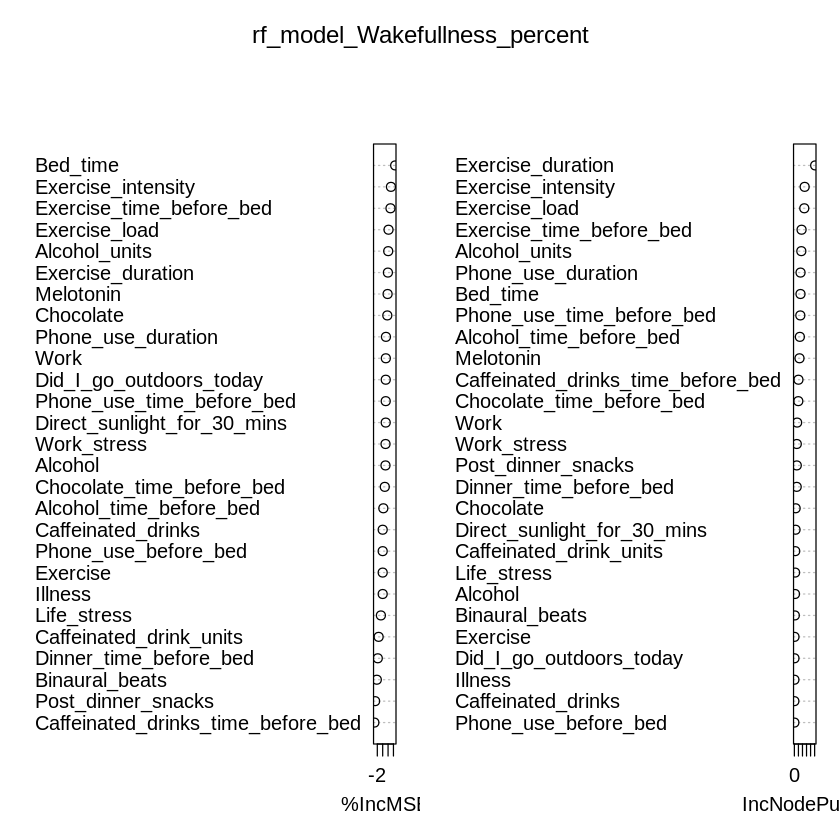

In [156]:
# Split into test and train datasets
# Set seed for reproducibility
set.seed(123)

# Check if 'Wakefullness_percent' column exists in df2_Wakefullness_percent
if (!"Wakefullness_percent" %in% colnames(df2_Wakefullness_percent)) {
  stop("Error: 'Wakefullness_percent' column not found in df2_Wakefullness_percent.")
}

# Check the number of unique values in 'Wakefullness_percent'
num_unique <- length(unique(df2_Wakefullness_percent$Wakefullness_percent))

# Check if there are enough unique values for partitioning
if (num_unique < 2) {
  stop(paste0("Error: 'Wakefullness_percent' has only ", num_unique,
              " unique value(s). Need at least 2 for partitioning."))
}

# Proceed with creating the data partition if there are enough unique values
trainIndex_Wakefullness_percent <- createDataPartition(df2_Wakefullness_percent$Wakefullness_percent,
                                                p = 0.8, list = FALSE, times = 1)

trainData_Wakefullness_percent <- df2_Wakefullness_percent[trainIndex_Wakefullness_percent, ]  # Use trainIndex_Wakefullness_percent
testData_Wakefullness_percent <- df2_Wakefullness_percent[-trainIndex_Wakefullness_percent, ] # Use trainIndex_Wakefullness_percent

# Build Random Forest Model with Wakefullness_percent_percent as the dependent variable and all other columns as predictors (~ .)
rf_model_Wakefullness_percent <- randomForest(Wakefullness_percent ~ ., data = trainData_Wakefullness_percent, importance = TRUE)

# View model summary
print(rf_model_Wakefullness_percent)

# Predict on test data
predictions_Wakefullness_percent <- predict(rf_model_Wakefullness_percent, newdata = testData_Wakefullness_percent)

# Evaluate performance using R-squared and RMSE
rf_performance_Wakefullness_percent <- postResample(pred = predictions_Wakefullness_percent, obs = testData_Wakefullness_percent$Wakefullness_percent)
print(rf_performance_Wakefullness_percent)

# Check variable importance
importance(rf_model_Wakefullness_percent)
varImpPlot(rf_model_Wakefullness_percent)

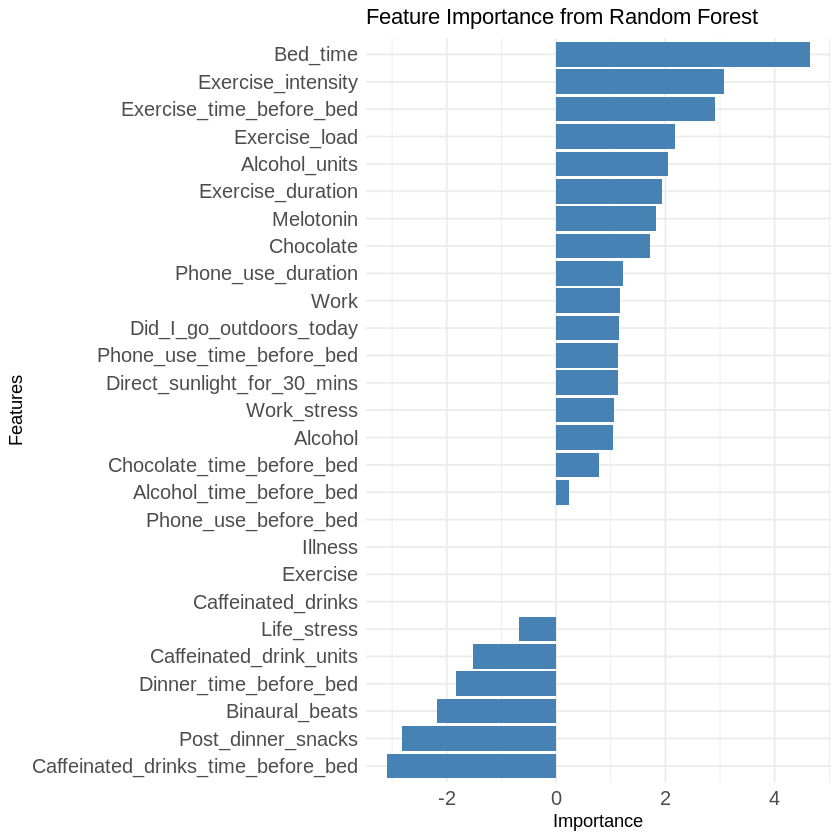

In [157]:
# Convert the importance values into a data frame
var_importance_Wakefullness_percent2 <- data.frame(Feature = rownames(importance(rf_model_Wakefullness_percent)),
                             Importance = importance(rf_model_Wakefullness_percent)[, 1])

# Plot the importance using ggplot2
ggplot(var_importance_Wakefullness_percent2, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Flip coordinates for better readability
  labs(title = "Feature Importance from Random Forest",
       x = "Features", y = "Importance") +
  theme_minimal() +  # Clean theme
  theme(axis.text.x = element_text(size = 12),  # Customize x-axis text
        axis.text.y = element_text(size = 12))  # Customize y-axis text

NOTE: Some columns (Alcohol_time_before_bed) contain NaN but SHOULD NOT BE REMOVED because when a related colummn (Alcohol) is No, the Alcohol_time_before_bed column is irrelevant and should be ignored. Many machine learning algorithms cannot handle this, but regressor algorithsm like XGBoost and LightGBM can handle NaN and automatically learn the best way to split data when missing values are encountered. These models will internally decide how to handle missing data during training, so there's no need for explicit imputation.

### XGBRegressor (Extreme Gradient Boosting) model with k-fold cross-validation
K-fold cross-validation https://www.statology.org/k-fold-cross-validation-in-r/ helps measure how well the predictions made by the model match the observed data.

[1]	train-rmse:32.477983+2.195357	test-rmse:32.277113+10.742666 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[2]	train-rmse:30.538564+1.958235	test-rmse:30.907346+10.400243 
[3]	train-rmse:28.484473+1.784775	test-rmse:29.866937+10.179836 
[4]	train-rmse:26.740519+1.561486	test-rmse:29.486813+10.274834 
[5]	train-rmse:25.287683+1.398466	test-rmse:29.213068+10.048190 
[6]	train-rmse:23.752980+1.353922	test-rmse:28.175810+9.828577 
[7]	train-rmse:22.387889+1.479197	test-rmse:27.212709+9.077437 
[8]	train-rmse:21.219337+1.456465	test-rmse:26.597901+8.740703 
[9]	train-rmse:20.282456+1.319246	test-rmse:26.420956+8.518718 
[10]	train-rmse:19.117392+1.312151	test-rmse:26.110717+8.173447 
[11]	train-rmse:18.014957+1.352125	test-rmse:25.638410+7.775754 
[12]	train-rmse:17.148313+1.436159	test-rmse:25.572566+7.570418 
[13]	train-rmse:16.373391+1.198714	test-rmse:25.443165+7.292258 
[14]	train-rmse:15.472554+1

Warning message in xgb.train(params, dtrain, nrounds, watchlist, verbose = verbose, :
“xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead.”


[1]	train-rmse:32.299368 
[2]	train-rmse:30.136782 
[3]	train-rmse:27.931793 
[4]	train-rmse:26.320311 
[5]	train-rmse:24.918290 
[6]	train-rmse:23.116894 
[7]	train-rmse:22.036979 
[8]	train-rmse:20.435745 
[9]	train-rmse:19.089770 
[10]	train-rmse:17.723948 
[11]	train-rmse:16.646109 
[12]	train-rmse:15.691148 
[13]	train-rmse:15.066812 
[14]	train-rmse:14.060787 
[15]	train-rmse:13.192245 
[16]	train-rmse:12.504527 
[17]	train-rmse:11.736036 
[18]	train-rmse:10.955142 
[19]	train-rmse:10.283280 
[20]	train-rmse:9.661409 
[21]	train-rmse:9.185795 
[22]	train-rmse:8.736832 
[23]	train-rmse:8.300092 
[24]	train-rmse:7.878363 
[25]	train-rmse:7.485123 
[26]	train-rmse:7.059945 
[27]	train-rmse:6.700936 
[28]	train-rmse:6.548468 
                               Feature         Gain       Cover   Frequency
                                <char>        <num>       <num>       <num>
 1:                       Melotonin.No 0.1730649263 0.121063395 0.063909774
 2:                  Exercise_dura

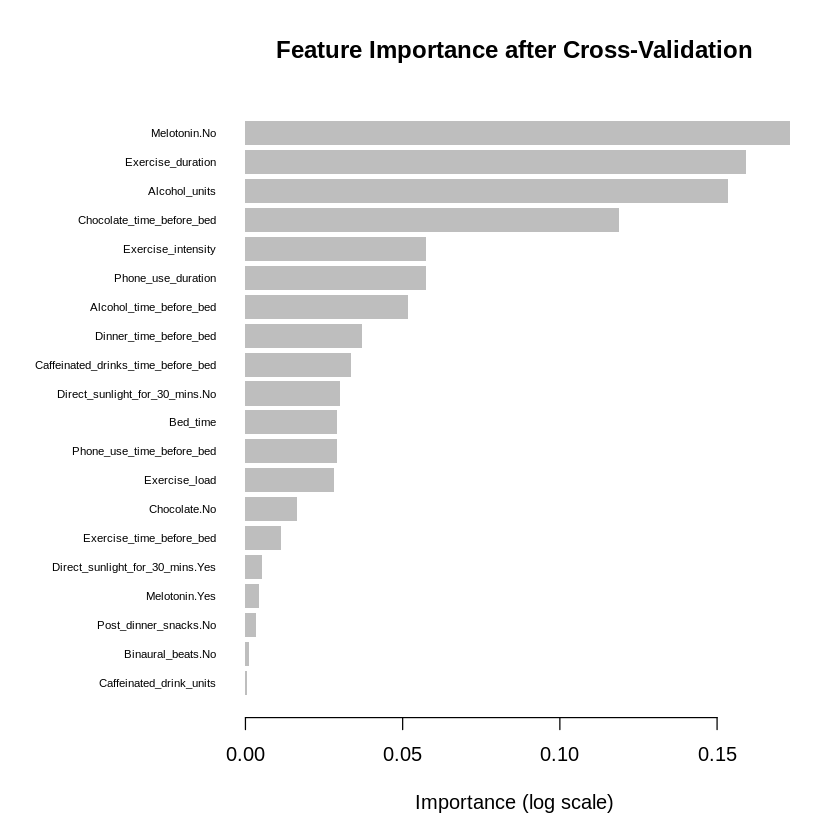

RMSE after CV: 6.55 
R-squared after CV: 0.984 
MAE after CV: 3.87 


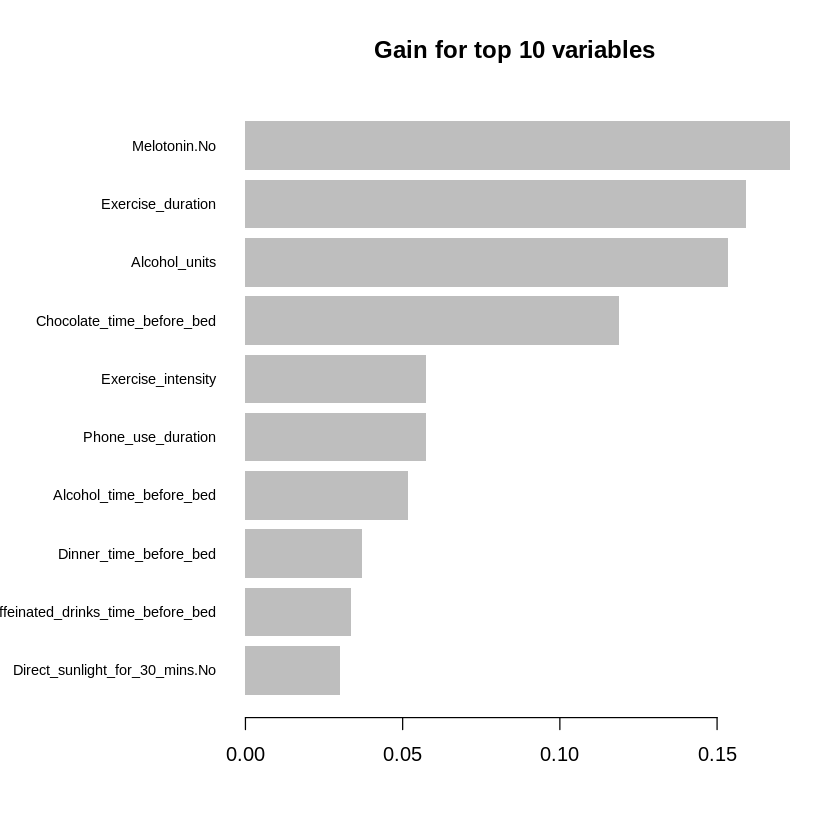

In [162]:
# Prepare the data
y_Wakefullness_percent <- df2_Wakefullness_percent$Wakefullness_percent
# Exclude the dependent variable from the independent variables
X_Wakefullness_percent <- df2_Wakefullness_percent[, !(names(df2_Wakefullness_percent) %in% c("Wakefullness_percent"))]

# Identify categorical features and perform one-hot encoding using dummyVars from caret
categorical_features <- names(X_Wakefullness_percent)[sapply(X_Wakefullness_percent, is.factor) | sapply(X_Wakefullness_percent, is.character)]
dummies <- dummyVars(" ~ .", data = X_Wakefullness_percent[, categorical_features])
X_Wakefullness_percent_encoded <- predict(dummies, newdata = X_Wakefullness_percent)

# Combine encoded categorical features with numeric features
X_Wakefullness_percent_final <- cbind(X_Wakefullness_percent[, !names(X_Wakefullness_percent) %in% categorical_features], X_Wakefullness_percent_encoded)
X_Wakefullness_percent_final <- as.matrix(X_Wakefullness_percent_final)

# Define parameters for XGBoost
params_Wakefullness <- list(
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 6,
  subsample = 0.8,
  colsample_bytree = 0.8,
  seed = 123
)

# Cross-validation
cv_results_Wakefullness <- xgb.cv(
  params = params_Wakefullness,
  data = X_Wakefullness_percent_final,
  label = y_Wakefullness_percent,
  nfold = 5,               # 5-fold cross-validation
  nrounds = 100,           # Number of boosting rounds
  metrics = "rmse",        # Metric to evaluate
  verbose = TRUE,          # Print CV progress
  early_stopping_rounds = 10,  # Stop if no improvement after 10 rounds
  maximize = FALSE         # Minimize RMSE
)

# Train the model using the optimal number of rounds from CV
best_nrounds_Wakefullness <- cv_results_Wakefullness$best_iteration

xgb_model_cv_Wakefullness <- xgboost(
  params = params_Wakefullness,
  data = X_Wakefullness_percent_final,
  label = y_Wakefullness_percent,
  nrounds = best_nrounds_Wakefullness,
  verbose = 1
)

# Feature importance
importance_matrix_cv_Wakefullness <- xgb.importance(feature_names = colnames(X_Wakefullness_percent_final), model = xgb_model_cv_Wakefullness)

# View feature importance metrics
print(importance_matrix_cv_Wakefullness)

# Plot the feature importance
xgb.plot.importance(importance_matrix_cv_Wakefullness,
    main = "Feature Importance after Cross-Validation",
    col = "grey",
    xlab = "Importance (log scale)"
)

# Visualise gain for top 10 variables
xgb.plot.importance(importance_matrix_cv_Wakefullness,
                    main = "Gain for top 10 variables",
                    col = "grey",  # Change bar color
                     top_n = 10,        # Display top 10 features
                     measure = "Gain")  # You can use "Gain", "Cover", "Frequency" or "Importance"

# Optional: Evaluate using the full dataset (you can also split into test/train to avoid data leakage)
predictions_xgb_cv_Wakefullness <- predict(xgb_model_cv_Wakefullness, newdata = X_Wakefullness_percent_final)

# Calculate performance metrics
rmse_xgb_cv_Wakefullness <- RMSE(predictions_xgb_cv_Wakefullness, y_Wakefullness_percent)
r2_xgb_cv_Wakefullness <- R2(predictions_xgb_cv_Wakefullness, y_Wakefullness_percent)
mae_xgb_cv_Wakefullness <- MAE(predictions_xgb_cv_Wakefullness, y_Wakefullness_percent)

# Print results
cat("RMSE after CV:", signif(rmse_xgb_cv_Wakefullness, 3), "\n")
cat("R-squared after CV:", signif(r2_xgb_cv_Wakefullness, 3), "\n")
cat("MAE after CV:", signif(mae_xgb_cv_Wakefullness, 3), "\n")

### ALTERNATIVE APPROACH: XGBBoost with Recursive Feature Elimination (RFE) and k-fold cross-validation
Recursive Feature Elimination (RFE) automates feature selection by iteratively removing the least important features based on model performance. RFE can be applied with any machine learning model, and it works by recursively fitting the model and ranking features by their importance, then pruning the least important features until the desired number of features is reached.

## Which is the best model?

In [163]:
# SLEEP QUALITY
# Extract Random Forest metrics
rf_rmse_Sleep_quality <- rf_performance_Sleep_quality["RMSE"]
rf_r2_Sleep_quality <- rf_performance_Sleep_quality["Rsquared"]
rf_mae_Sleep_quality <- rf_performance_Sleep_quality["MAE"]
# Extract XGBoost metrics
xgb_rmse_Sleep_quality <- rmse_xgb_cv_Sleep_quality
xgb_r2_Sleep_quality <- r2_xgb_cv_Sleep_quality
xgb_mae_Sleep_quality <- mae_xgb_cv_Sleep_quality
# Combine the data into a tibble
performance_comparison_Sleep_quality <- tibble(
  Metric = c("RMSE", "R^2", "MAE"),
  Random_Forest = c(rf_rmse_Sleep_quality, rf_r2_Sleep_quality, rf_mae_Sleep_quality),
  XGBoost = c(xgb_rmse_Sleep_quality, xgb_r2_Sleep_quality, xgb_mae_Sleep_quality)
)

# SLEEP DURATION
# Extract Random Forest metrics
rf_rmse_Total_sleep_time <- rf_performance_Total_sleep_time["RMSE"]
rf_r2_Total_sleep_time <- rf_performance_Total_sleep_time["Rsquared"]
rf_mae_Total_sleep_time <- rf_performance_Total_sleep_time["MAE"]
# Extract XGBoost metrics
xgb_rmse_Total_sleep_time <- rmse_xgb_cv_Total_sleep_time
xgb_r2_Total_sleep_time <- r2_xgb_cv_Total_sleep_time
xgb_mae_Total_sleep_time <- mae_xgb_cv_Total_sleep_time
# Combine the data into a tibble
performance_comparison_Total_sleep_time <- tibble(
  Metric = c("RMSE", "R^2", "MAE"),
  Random_Forest = c(rf_rmse_Total_sleep_time, rf_r2_Total_sleep_time, rf_mae_Total_sleep_time),
  XGBoost = c(xgb_rmse_Total_sleep_time, xgb_r2_Total_sleep_time, xgb_mae_Total_sleep_time)
)

# SLEEP ONSET LATENCY
# Extract Random Forest metrics
rf_rmse_Sleep_onset_latency_log <- rf_performance_Sleep_onset_latency_log["RMSE"]
rf_r2_Sleep_onset_latency_log <- rf_performance_Sleep_onset_latency_log["Rsquared"]
rf_mae_Sleep_onset_latency_log <- rf_performance_Sleep_onset_latency_log["MAE"]
# Extract XGBoost metrics
xgb_rmse_Sleep_onset_latency_log <- rmse_xgb_cv_Sleep_onset_latency
xgb_r2_Sleep_onset_latency_log <- r2_xgb_cv_Sleep_onset_latency
xgb_mae_Sleep_onset_latency_log <- mae_xgb_cv_Sleep_onset_latency
# Combine the data into a tibble
performance_comparison_Sleep_onset_latency_log <- tibble(
  Metric = c("RMSE", "R^2", "MAE"),
  Random_Forest = c(rf_rmse_Sleep_onset_latency_log, rf_r2_Sleep_onset_latency_log, rf_mae_Sleep_onset_latency_log),
  XGBoost = c(xgb_rmse_Sleep_onset_latency_log, xgb_r2_Sleep_onset_latency_log, xgb_mae_Sleep_onset_latency_log)
)

# WAKEFULLNESS
# Extract Random Forest metrics
rf_rmse_Wakefullness_percent <- rf_performance_Wakefullness_percent["RMSE"]
rf_r2_Wakefullness_percent <- rf_performance_Wakefullness_percent["Rsquared"]
rf_mae_Wakefullness_percent <- rf_performance_Wakefullness_percent["MAE"]
# Extract XGBoost metrics
xgb_rmse_Wakefullness_percent <- rmse_xgb_cv_Wakefullness
xgb_r2_Wakefullness_percent <- r2_xgb_cv_Wakefullness
xgb_mae_Wakefullness_percent <- mae_xgb_cv_Wakefullness
# Combine the data into a tibble
performance_comparison_Wakefullness_percent <- tibble(
  Metric = c("RMSE", "R^2", "MAE"),
  Random_Forest = c(rf_rmse_Wakefullness_percent, rf_r2_Wakefullness_percent, rf_mae_Wakefullness_percent),
  XGBoost = c(xgb_rmse_Wakefullness_percent, xgb_r2_Wakefullness_percent, xgb_mae_Wakefullness_percent)
)

# Print the tibbles
cat("SLEEP QUALITY:\n")
print(performance_comparison_Sleep_quality)
cat("\nSLEEP DURATION:\n")
print(performance_comparison_Total_sleep_time)
cat("\nSLEEP ONSET LATENCY:\n")
print(performance_comparison_Sleep_onset_latency_log)
cat("\nWAKEFULLNESS:\n")
print(performance_comparison_Wakefullness_percent)

SLEEP QUALITY:
# A tibble: 3 × 3
  Metric Random_Forest XGBoost
  <chr>          <dbl>   <dbl>
1 RMSE          31.2     4.15 
2 R^2            0.345   0.987
3 MAE           25.9     2.78 

SLEEP DURATION:
# A tibble: 3 × 3
  Metric Random_Forest XGBoost
  <chr>          <dbl>   <dbl>
1 RMSE           0.517   0.292
2 R^2            0.931   0.929
3 MAE            0.448   0.193

SLEEP ONSET LATENCY:
# A tibble: 3 × 3
  Metric Random_Forest XGBoost
  <chr>          <dbl>   <dbl>
1 RMSE           0.673  0.0799
2 R^2            0.564  0.992 
3 MAE            0.662  0.0529

WAKEFULLNESS:
# A tibble: 3 × 3
  Metric Random_Forest XGBoost
  <chr>          <dbl>   <dbl>
1 RMSE          29.4     6.55 
2 R^2            0.213   0.984
3 MAE           27.5     3.87 


The XGBoost model outperforms the Random Forest model (lower RMSE and higher r-squared value for all sleep metrics)

## Which are the best features?

In [173]:
# SLEEP QUALITY
# Sort the importance matrix by Gain
sorted_importance_Sleep_quality <- importance_matrix_Sleep_quality[order(-importance_matrix_Sleep_quality$Gain), ]
# Get the top 5 important variables
top_5_importants_Sleep_quality <- head(sorted_importance_Sleep_quality, 5)
# Round numeric columns to 3 decimal places
top_5_importants_Sleep_quality$Gain <- round(top_5_importants_Sleep_quality$Gain, 3)
top_5_importants_Sleep_quality$Cover <- round(top_5_importants_Sleep_quality$Cover, 3)
top_5_importants_Sleep_quality$Frequency <- round(top_5_importants_Sleep_quality$Frequency, 3)
top_5_importants_Sleep_quality$Importance <- round(top_5_importants_Sleep_quality$Importance, 3)

# SLEEP DURATION
# Sort the importance matrix by Gain
sorted_importance_Total_sleep_time <- importance_matrix_Total_sleep_time[order(-importance_matrix_Total_sleep_time$Gain), ]
# Get the top 5 important variables
top_5_importants_Total_sleep_time <- head(sorted_importance_Total_sleep_time, 5)
# Round numeric columns to 3 decimal places
top_5_importants_Total_sleep_time$Gain <- round(top_5_importants_Total_sleep_time$Gain, 3)
top_5_importants_Total_sleep_time$Cover <- round(top_5_importants_Total_sleep_time$Cover, 3)
top_5_importants_Total_sleep_time$Frequency <- round(top_5_importants_Total_sleep_time$Frequency, 3)
top_5_importants_Total_sleep_time$Importance <- round(top_5_importants_Total_sleep_time$Importance, 3)

# SLEEP ONSET LATENCY
# Sort the importance matrix by Gain
sorted_importance_Sleep_onset_latency_log <- importance_matrix_Sleep_onset_latency_log[order(-importance_matrix_Sleep_onset_latency_log$Gain), ]
# Get the top 5 important variables
top_5_importants_Sleep_onset_latency_log <- head(sorted_importance_Sleep_onset_latency_log, 5)
# Round numeric columns to 3 decimal places
top_5_importants_Sleep_onset_latency_log$Gain <- round(top_5_importants_Sleep_onset_latency_log$Gain, 3)
top_5_importants_Sleep_onset_latency_log$Cover <- round(top_5_importants_Sleep_onset_latency_log$Cover, 3)
top_5_importants_Sleep_onset_latency_log$Frequency <- round(top_5_importants_Sleep_onset_latency_log$Frequency, 3)
top_5_importants_Sleep_onset_latency_log$Importance <- round(top_5_importants_Sleep_onset_latency_log$Importance, 3)

# WAKEFULLNESS
# Sort the importance matrix by Gain
sorted_importance_Wakefullness_percent <- importance_matrix_Wakefullness_percent[order(-importance_matrix_Wakefullness_percent$Gain), ]
# Get the top 5 important variables
top_5_importants_Wakefullness_percent <- head(sorted_importance_Wakefullness_percent, 5)
# Round numeric columns to 3 decimal places
top_5_importants_Wakefullness_percent$Gain <- round(top_5_importants_Wakefullness_percent$Gain, 3)
top_5_importants_Wakefullness_percent$Cover <- round(top_5_importants_Wakefullness_percent$Cover, 3)
top_5_importants_Wakefullness_percent$Frequency <- round(top_5_importants_Wakefullness_percent$Frequency, 3)
top_5_importants_Wakefullness_percent$Importance <- round(top_5_importants_Wakefullness_percent$Importance, 3)

# Print the importance data
cat("\nSLEEP QUALITY:\n")
print(top_5_importants_Sleep_quality)
cat("\nSLEEP DURATION:\n")
print(top_5_importants_Total_sleep_time)
cat("\nSLEEP ONSET LATENCY:\n")
print(top_5_importants_Sleep_onset_latency_log)
cat("\nWAKEFULLNESS:\n")
print(top_5_importants_Wakefullness_percent)


SLEEP QUALITY:
                              Feature  Gain Cover Frequency Importance
                               <char> <num> <num>     <num>      <num>
1:                 Phone_use_duration 0.135 0.083     0.080      0.135
2:           Exercise_time_before_bed 0.100 0.051     0.037      0.100
3:                  Exercise_duration 0.093 0.088     0.073      0.093
4: Caffeinated_drinks_time_before_bed 0.090 0.101     0.110      0.090
5:          Chocolate_time_before_bed 0.088 0.123     0.100      0.088

SLEEP DURATION:
                     Feature  Gain Cover Frequency Importance
                      <char> <num> <num>     <num>      <num>
1:  Exercise_time_before_bed 0.163 0.092     0.055      0.163
2: Chocolate_time_before_bed 0.150 0.135     0.123      0.150
3:               Work_stress 0.080 0.052     0.035      0.080
4:             Exercise_load 0.080 0.044     0.040      0.080
5:    Dinner_time_before_bed 0.066 0.161     0.188      0.066

SLEEP ONSET LATENCY:
              

In [181]:
cat("\nMy sleep quality is most affected by:\n")
  print(features_Sleep_quality)
cat("\nMy sleep duration is most affected by:\n")
  print(features_Total_sleep_time)
cat("\nThe time it takes for me to fall sleep is most affected by:\n")
  print(features_Sleep_onset_latency)
cat("\nThe number of interuptions to my sleep is most affected by:\n")
  print(features_Wakefullness)


My sleep quality is most affected by:
[1] "Phone_use_duration"                 "Exercise_time_before_bed"          
[3] "Exercise_duration"                  "Caffeinated_drinks_time_before_bed"
[5] "Chocolate_time_before_bed"         

My sleep duration is most affected by:
[1] "Exercise_time_before_bed"  "Chocolate_time_before_bed"
[3] "Work_stress"               "Exercise_load"            
[5] "Dinner_time_before_bed"   

The time it takes for me to fall sleep is most affected by:
[1] "Exercise_time_before_bed"       "Exercise_duration"             
[3] "Phone_use_duration"             "Direct_sunlight_for_30_mins.No"
[5] "Exercise_load"                 

The number of interuptions to my sleep is most affected by:
[1] "Alcohol_units"             "Chocolate_time_before_bed"
[3] "Exercise_duration"         "Phone_use_duration"       
[5] "Alcohol_time_before_bed"  


### Common features across all sleep-related variables.

In [183]:
# Extract the feature names from each top 5 importance data frame
features_Sleep_quality <- top_5_importants_Sleep_quality$Feature  # Assuming the feature names are in a column named "Feature"
features_Total_sleep_time <- top_5_importants_Total_sleep_time$Feature
features_Sleep_onset_latency <- top_5_importants_Sleep_onset_latency_log$Feature
features_Wakefullness <- top_5_importants_Wakefullness_percent$Feature

# Combine all feature names into a single data frame
all_features <- data.frame(Feature = unique(c(features_Sleep_quality,
                                               features_Total_sleep_time,
                                               features_Sleep_onset_latency,
                                               features_Wakefullness)))

# Count occurrences of each feature across the four lists
all_features$Count <- sapply(all_features$Feature, function(feature) {
  sum(feature %in% features_Sleep_quality) +
  sum(feature %in% features_Total_sleep_time) +
  sum(feature %in% features_Sleep_onset_latency) +
  sum(feature %in% features_Wakefullness)
})

# Find the common features across all four categories
common_features <- Reduce(intersect, list(features_Sleep_quality, features_Total_sleep_time, features_Sleep_onset_latency, features_Wakefullness))

# Print the common features, if any
if (length(common_features) > 0) {
  cat("\nCommon features in the top 5 across all sleep-related variables:\n")
  print(common_features)
} else {
  cat("\nThere are no common features in the top 5 across all sleep-related variables.\n")
}

# Filter features that appear in at least 3 of the 4 categories
common_features_at_least_3 <- all_features$Feature[all_features$Count >= 3]

# Print the common features, if any
if (length(common_features_at_least_3) > 0) {
  cat("\nCommon features in the top 5 in at least 3 of the 4 sleep-related variables:\n")
  print(common_features_at_least_3)
} else {
  cat("\nThere are no common features in the top 5 in at least 3 of the 4 sleep-related variables.\n")
}

# Filter features that appear in at least 2 of the 4 categories
common_features_at_least_2 <- all_features$Feature[all_features$Count >= 2]

# Print the common features, if any
if (length(common_features_at_least_2) > 0) {
  cat("\nCommon features in the top 5 in at least 2 of the 4 sleep-related variables:\n")
  print(common_features_at_least_2)
} else {
  cat("\nThere are no common features in the top 5 in at least 2 of the 4 sleep-related variables.\n")
}


There are no common features in the top 5 across all sleep-related variables.

Common features in the top 5 in at least 3 of the 4 sleep-related variables:
[1] "Phone_use_duration"        "Exercise_time_before_bed" 
[3] "Exercise_duration"         "Chocolate_time_before_bed"

Common features in the top 5 in at least 2 of the 4 sleep-related variables:
[1] "Phone_use_duration"        "Exercise_time_before_bed" 
[3] "Exercise_duration"         "Chocolate_time_before_bed"
[5] "Exercise_load"            


The following variables impair my general sleep hygiene:<br>
<ul>
<li> Longer "Phone_use_duration" before bed.<br>
<li> Shorter "Exercise_time_before_bed"<br>
<li> Longer "Exercise_duration"<br>
<li> Shorter "Chocolate_time_before_bed"<br>
<li> Larger "Exercise_load"
</ul>